# Analysis of the MIMIC-III Dataset

## Abstract

This study leverages the MIMIC-III (Medical Information Mart for Intensive Care III) database, which contains health data from ICU patients at the Beth Israel Deaconess Medical Center (2001-2012). This study investigates patient demographics, admission trends, and developed predictive models for ICU readmission. The analysis highlights that older adults (ages 58 and above) dominate ICU admissions, with gender and ethnicity showing minimal impact on ICU stay length. Cardiovascular (19.0%) and respiratory (15.4%) issues were the most common reasons for admission across patients in the dataset.

Seasonal and time-of-day patterns were observed in ICU mortality, with higher death rates in winter and during evening hours. Additionally, several models were built to predict patient readmission within 30 days. The best performing model was logistic regression with oversampling, achieving an accuracy of (placeholder)% and an F1 score of (placeholder). These findings emphasize the utility of machine learning in identifying high-risk patients and improving critical care outcomes.

## Introduction

MIMIC-III (Medical Information Mart for Intensive Care III) is a large, publicly available database composed of detailed health information related to deidentified patients admitted to critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012 ([Johnson et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/)). This database has been utilized by researchers across the globe to study patient outcomes in critical care, facilitate the development of predictive models, and support the application of machine learning techniques to analyze patient health data.

This relational database consists of 26 tables, encompassing a broad range of clinical data including detailed information such as patient demographics, vital signs, laboratory results, and diagnoses ([Johnson et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/)). Its detail and scope have made it a valuable resource of medical research, enabling studies that span fields such as artificial intelligence, personalized medicine, and computer science for the prediction of health outcomes ([Rajkomar et al., 2018](https://www.nature.com/articles/s41746-018-0029-1); [Che et al., 2018](https://www.nature.com/articles/s41598-018-24271-9); [McManamay & DeRolph, 2019](https://www.nature.com/articles/sdata201917)).

This study utilizes MIMIC-III version 1.4, which is the most current version of the database at the time of analysis ([Johnson, 2016](https://doi.org/10.13026/C2XW26)). The analysis conducted in this journal explores the distribution of patient demographics, time series analysis of ICU admission, and predicting the likelihood of patient readmission. Through the use of detailed graphics and machine learning algorithms, this study aims to provide insight into patterns in critical care admission and improve patient outcomes.

## Exploratory Data Analysis and Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from query import query_a, query_b, query_c, query_d, mapped_ethnicies
from diagnosis import mapped_diagnosis

### Age and Gender Distribution

In [2]:
df_a = query_a()
df_a = df_a.drop_duplicates()

df_a['death_time'] = pd.Categorical(df_a['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
df_a['death_time'] = np.where(df_a['death_days'].isna(), "death not within 90 days of discharge", df_a['death_time'])

df_a['age'] = df_a['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_a.head(2))
df_a.info()

  gender  age     los  death_days                             death_time  \
0      F   65  3.2490         0.0                  death within hospital   
1      M   40  3.2788         NaN  death not within 90 days of discharge   

   hospital_expire_flag  
0                     1  
1                     0  
<class 'pandas.core.frame.DataFrame'>
Index: 102702 entries, 0 to 116425
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                102702 non-null  object 
 1   age                   102702 non-null  int64  
 2   los                   102696 non-null  float64
 3   death_days            56046 non-null   float64
 4   death_time            102702 non-null  object 
 5   hospital_expire_flag  102702 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.5+ MB


According to the overview of the data, we have gender and age information on patients, along with their length of stay and how long after hospital ICU admission their reported death was. The hospital expire flag notes whether the patient died within the hospital care (1) or outside of the hospital care (0). There are a total of 52,125 patient records gathered from this query. Patients who were above the age of 79 at admission have had their ages obscured for HIPAA and have an age of 300 years; these patient records were removed during the query process. The age column was adjusted to account for records with ages above 79 being removed from analysis; any ages, then, recorded above 79 are erroneous and must be adjusted. For instance, a 91-year-old patient would not have their age recorded as 91, but as 300. Likely, this means that there was a computing error in the year of birth and admittance year by a difference of 100, meaning this patient should be 9-years-old.

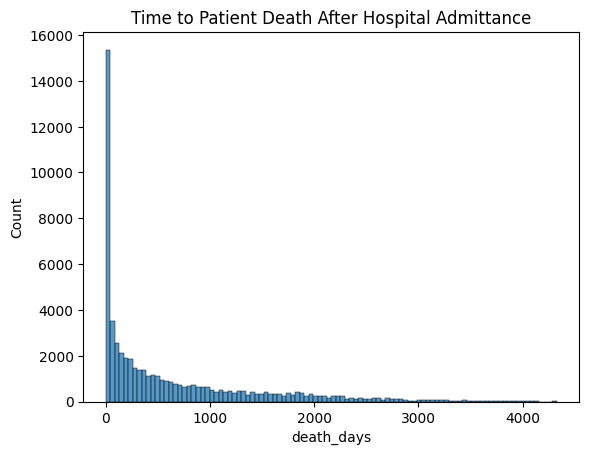

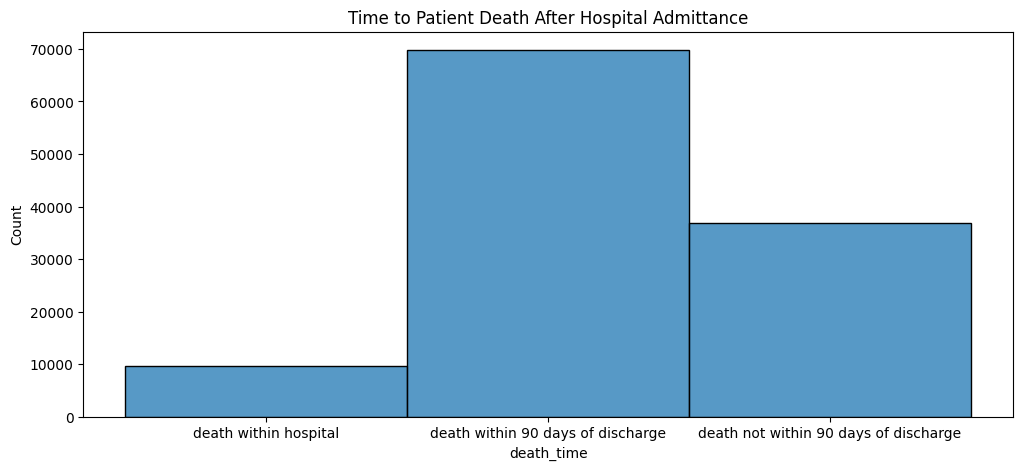

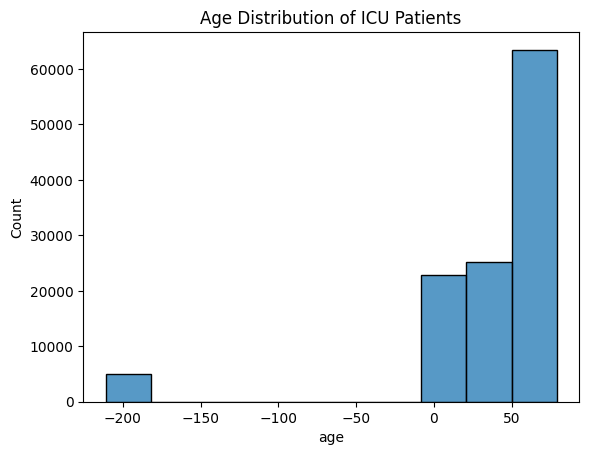

|       |         age |
|:------|------------:|
| count | 116426      |
| mean  |     36.8084 |
| std   |     55.0594 |
| min   |   -211      |
| 25%   |     23      |
| 50%   |     53      |
| 75%   |     65      |
| max   |     79      |


In [3]:
sns.histplot(df_a['death_days'], bins=100)
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

f, ax = plt.subplots(figsize = (12,5))

sns.histplot(df_a['death_time'])
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

sns.histplot(df_a['age'], bins=10)
plt.title('Age Distribution of ICU Patients')
plt.show()

print(df_a['age'].describe().to_markdown())

The time to patient death plot is skewed right, suggesting that the vast majority of patients admitted to the ICU do not die within, or even within 250 days of hospital admittance. The following plot uses the time to death, which is either within the hospital, within 90 days of hospital admittance, or greater than 90 days of hospital admittance. This supports the conclusion that the majority of patients are not dying within the hospital. However, in terms of age, many of the patients admitted to the ICU are considered older adults. Half of the patients admitted to the ICU are older than 58 years of age; note that this does not account for patients older than 79 years of age at admittance, as they were removed for this analysis.

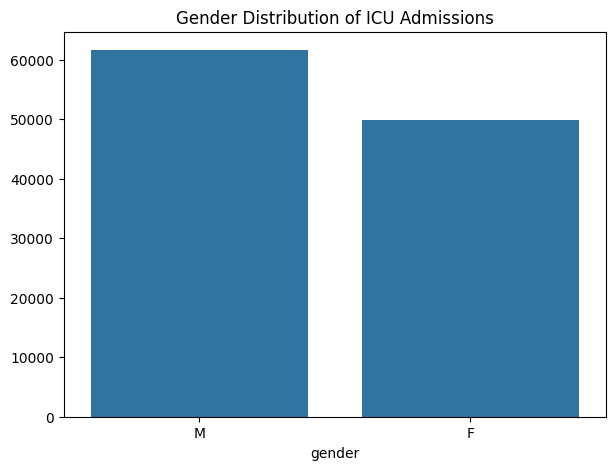

| gender   |   count |
|:---------|--------:|
| M        |   61618 |
| F        |   49839 |


In [4]:
f, ax = plt.subplots(figsize = (7,5))
gender_counts = df_a['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of ICU Admissions')
plt.show()

print(df_a['gender'].value_counts().to_markdown())

The majority of the patients admitted to the ICU are male (55.92%).

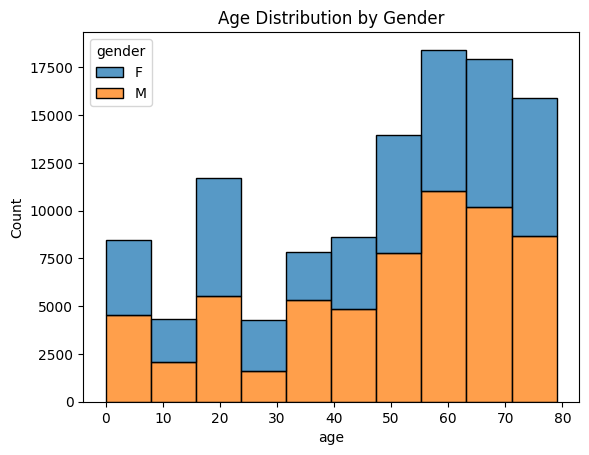

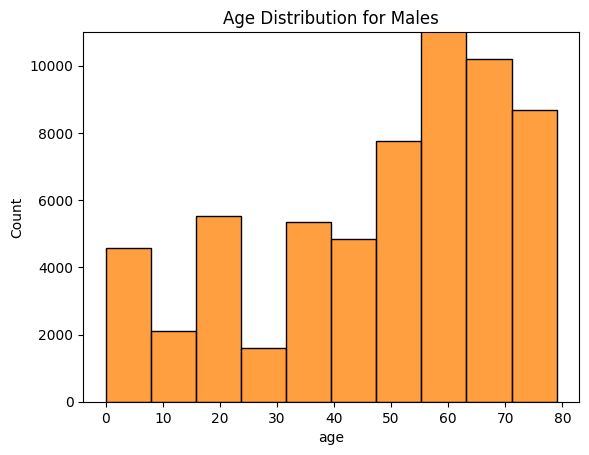

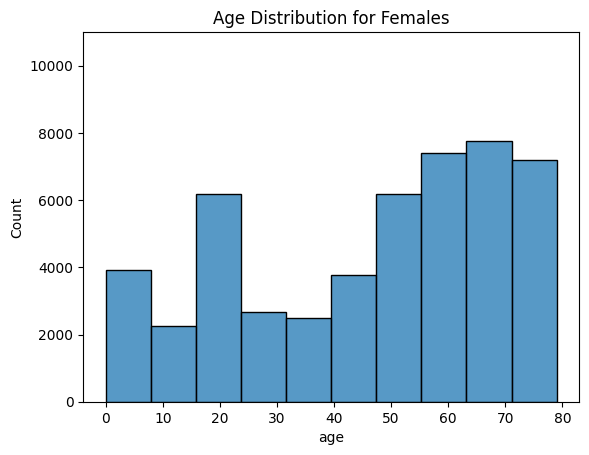

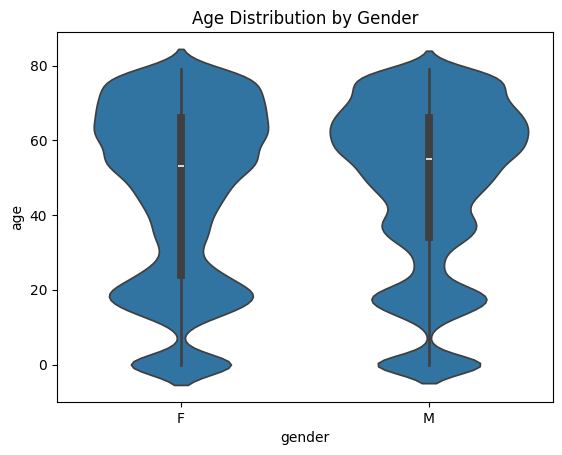

gender                F             M
age count  49839.000000  61618.000000
    mean      46.236000     48.349103
    std       23.746503     22.612999
    min        0.000000      0.000000
    25%       24.000000     34.000000
    50%       53.000000     55.000000
    75%       66.000000     66.000000
    max       79.000000     79.000000

In [6]:
sns.histplot(data=df_a, x='age', hue='gender', multiple='stack', bins=10)
plt.title('Age Distribution by Gender')
plt.show()

sns.histplot(data=df_a[df_a['gender'] == "M"], x='age', bins=10, color = '#ff7f00')
plt.title('Age Distribution for Males')
plt.ylim(0,11000)
plt.show()

sns.histplot(data=df_a[df_a['gender'] == "F"], x='age', bins=10)
plt.title('Age Distribution for Females')
plt.ylim(0,11000)
plt.show()

sns.violinplot(x='gender', y='age', data=df_a)
plt.title('Age Distribution by Gender')
plt.show()

df_a[['gender', 'age']].groupby('gender').describe().transpose()

The age distribution of patients by gender suggests that on average, males are older when admitted to the ICU. It is worthwhile to note that the 20-30 year old age group has a peak in admittance along with the older adults (>60 years of age).

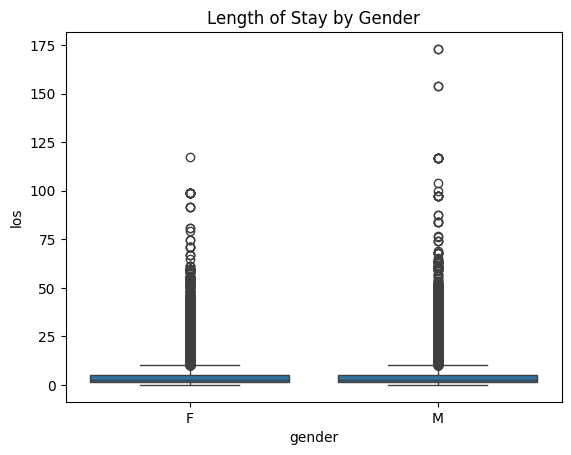

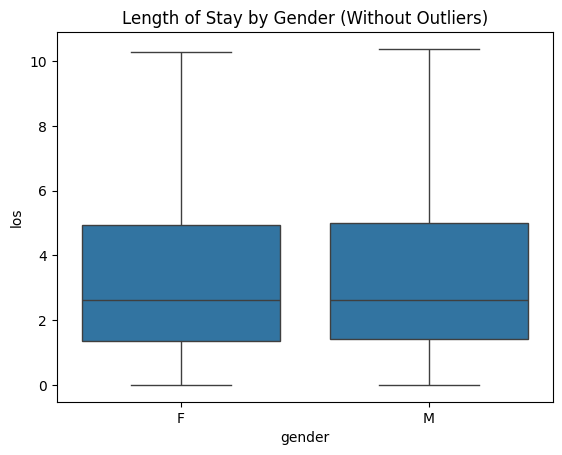

gender                F             M
los count  22976.000000  29145.000000
    mean       4.793814      4.914960
    std        7.091207      7.552335
    min        0.000100      0.000200
    25%        1.370800      1.422200
    50%        2.610000      2.633800
    75%        4.937400      5.005500
    max      117.335100    173.072500

In [9]:
sns.boxplot(x='gender', y='los', data=df_a)
plt.title('Length of Stay by Gender')
plt.show()

sns.boxplot(x='gender', y='los', data=df_a, showfliers = False)
plt.title('Length of Stay by Gender (Without Outliers)')
plt.show()

df_a[['gender', 'los']].groupby('gender').describe().transpose()

These boxplots suggest that males tend to have a longer stay at the ICU. This may be due to males being the majority of older patients or potentially having longer stays in the Neonatal ICU, as premature infants are more likely to be male ([Garland et al., 2013](https://www.nature.com/articles/pr201150); [Peacock et al., 2012](https://www.nature.com/articles/pr201150)). It is of note that these differences between male and female admittances to the ICU were not statistically significant.

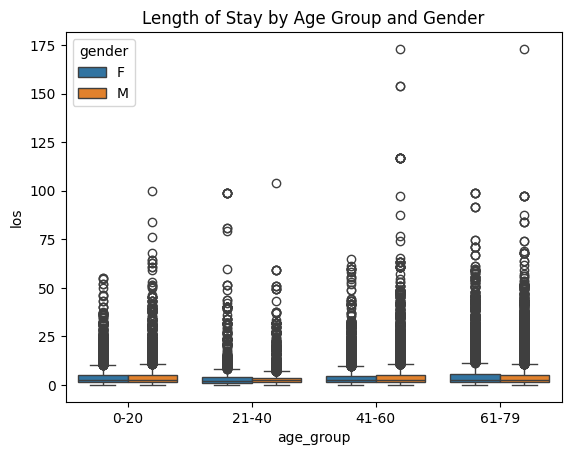

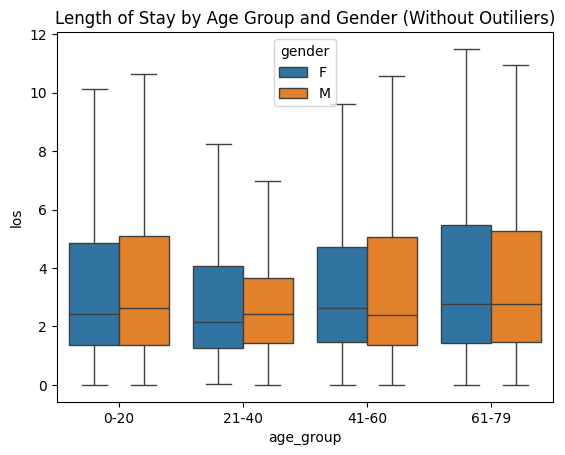

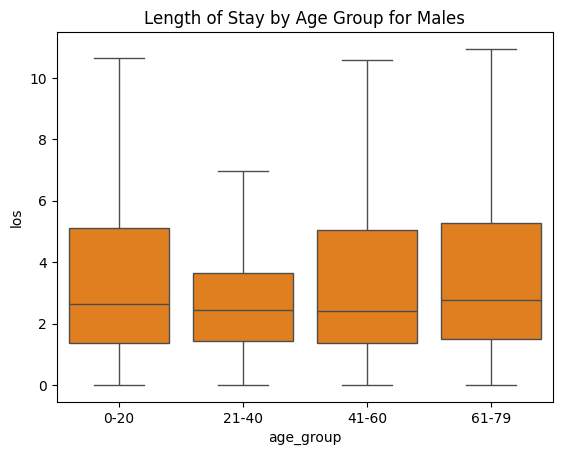

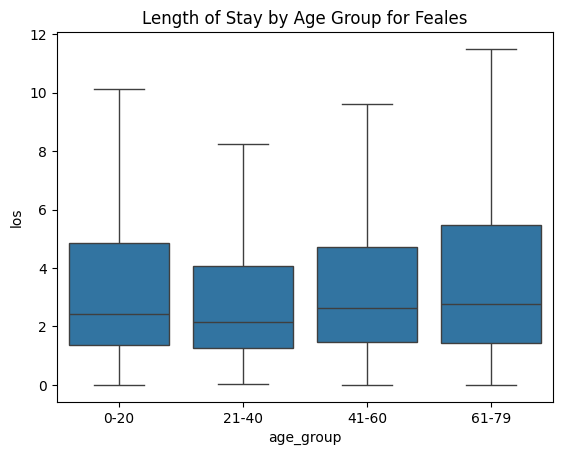

In [52]:
df_a['age_group'] = pd.cut(df_a['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])
sns.boxplot(x='age_group', y='los', hue='gender', data=df_a)
plt.title('Length of Stay by Age Group and Gender')
plt.show()

sns.boxplot(x='age_group', y='los', hue='gender', data=df_a, showfliers = False)
plt.title('Length of Stay by Age Group and Gender (Without Outiliers)')
plt.show()

sns.boxplot(x='age_group', y='los', data=df_a[df_a['gender'] == "M"], showfliers = False, color = '#ff7f00')
plt.title('Length of Stay by Age Group for Males')
plt.show()

sns.boxplot(x='age_group', y='los', data=df_a[df_a['gender'] == "F"], showfliers = False)
plt.title('Length of Stay by Age Group for Females')
plt.show()

The length of stay does not vary significantly between the presented age groups. However, there are minor differences in length of stay between the younger patients (<61 years of age), who appear to have a trend for shorter ICU stay.

### Demographic Analysis

In [12]:
df_b = query_b()
df_b.dropna()
df_b = df_b.drop_duplicates()

df_b['death_time'] = pd.Categorical(df_b['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
df_b['death_time'] = np.where(df_b['death_days'].isna(), "death not within 90 days of discharge", df_b['death_time'])

df_b['age'] = df_b['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_b.head(2))
df_b.info()

  gender  age insurance      religion marital_status           ethnicity  \
0      F   65  Medicare      CATHOLIC      SEPARATED  HISPANIC OR LATINO   
1      M   40  Medicaid  UNOBTAINABLE         SINGLE               WHITE   

                  diagnosis     los  death_days  \
0                   DYSPNEA  3.2490         0.0   
1  SEPSIS;PILONIDAL ABSCESS  3.2788         NaN   

                              death_time  hospital_expire_flag  
0                  death within hospital                     1  
1  death not within 90 days of discharge                     0  
<class 'pandas.core.frame.DataFrame'>
Index: 109001 entries, 0 to 111456
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                109001 non-null  object 
 1   age                   109001 non-null  int64  
 2   insurance             109001 non-null  object 
 3   religion              108497 non-null  object 
 4  

This query includes new information, including insurance type, religion, marital status, self-reported ethnicity, and ICU diagnosis. This data allows for analysis on patient demographics and admission diagnoses.

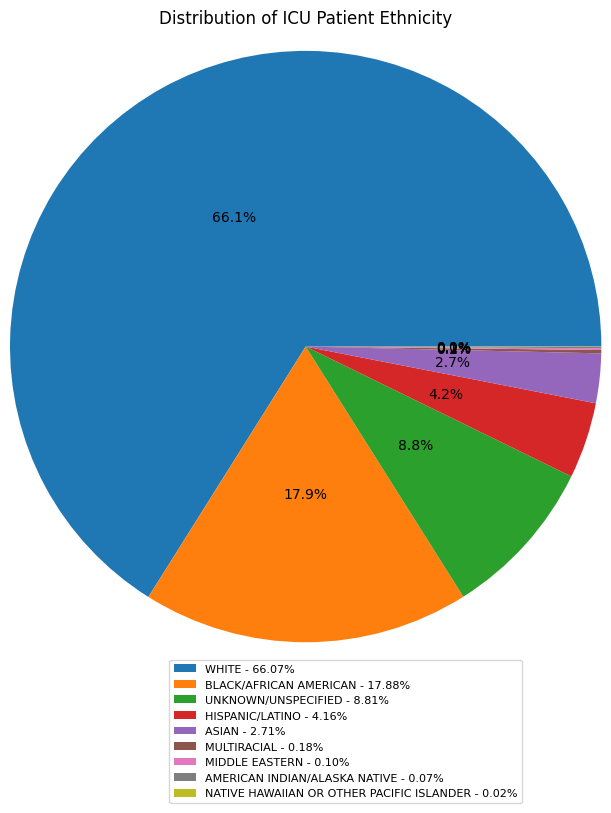

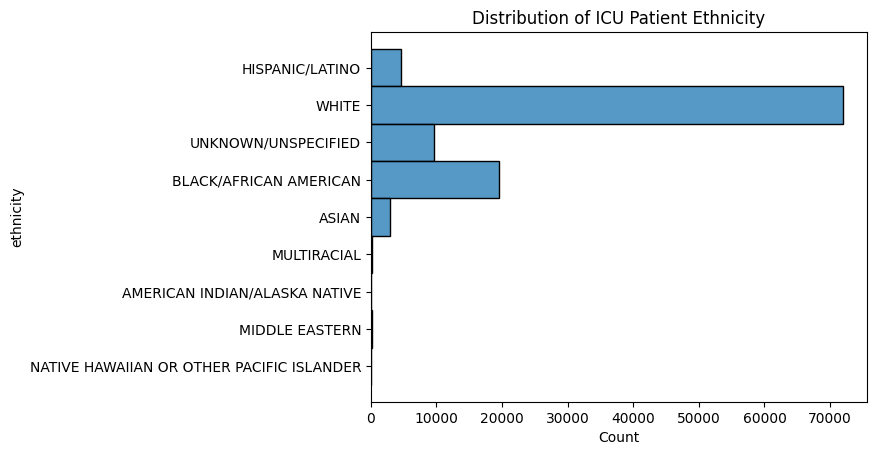

In [13]:
df_b['ethnicity'] = mapped_ethnicies(df_b['ethnicity'])

eth_counts = df_b['ethnicity'].value_counts()
eth_labels = eth_counts.index
eth_percentages = eth_counts / eth_counts.sum() * 100

f, ax = plt.subplots()
patches, texts, autotexts = ax.pie(eth_counts, labels = None, autopct='%1.1f%%', pctdistance=0.5, radius = 2)
legend_labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(eth_labels, eth_percentages)]
plt.title(label = "Distribution of ICU Patient Ethnicity", pad = 20, y = 1.3)
plt.legend(patches, legend_labels, loc='lower right', fontsize=8, bbox_to_anchor=(1.1,-.75))
plt.show()

sns.histplot(y = df_b['ethnicity'])
plt.title('Distribution of ICU Patient Ethnicity')
plt.show()

The majority of patients admitted to the ICU are White (67.0%) followed by Black/African American (17.3%) patients. Most patients did not report having a Hispanic/Latino background.

The ethnic distribution of Boston's population as of 2022 is 43% White followed by 20% Black/African American ([Census Reporter, 2024](https://censusreporter.org/profiles/16000US2507000-boston-ma/)). Since the distribution of patient ethnicity does not accurately reflect the true ethnic composition of Boston, it is likely that the higher proportion of White patients is due to a greater incidence of life-threatening diseases in this group. For instance, White patients are more likely to contract skin cancer compared to other ethnicities ([American Cancer Society, 2024](https://www.cancer.org/cancer/types/melanoma-skin-cancer/about/key-statistics.html)).

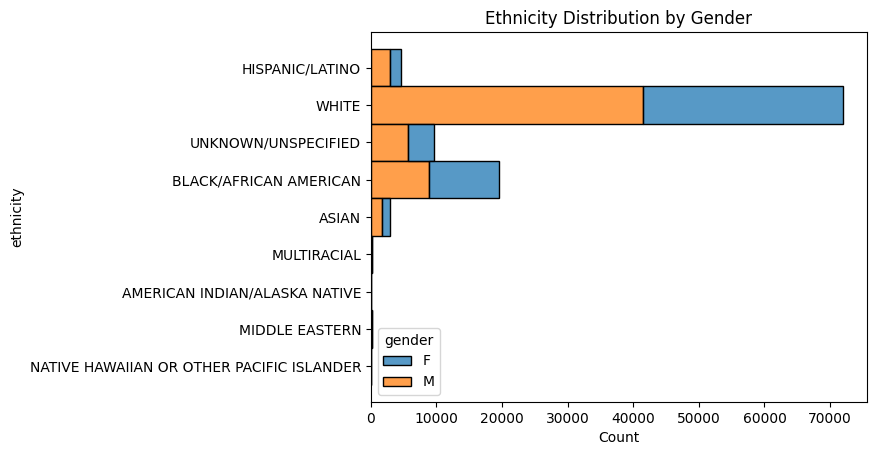

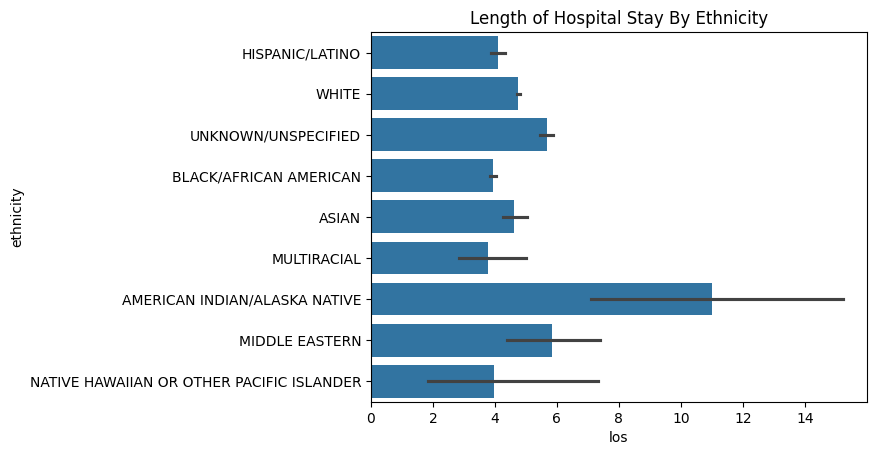

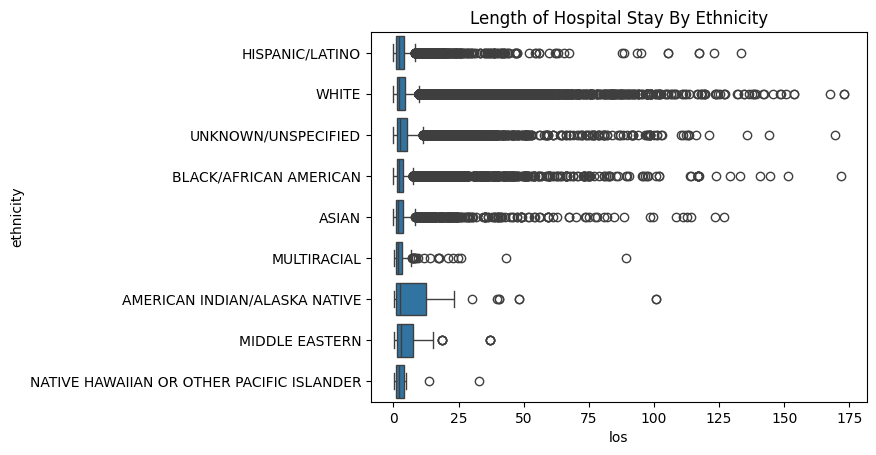

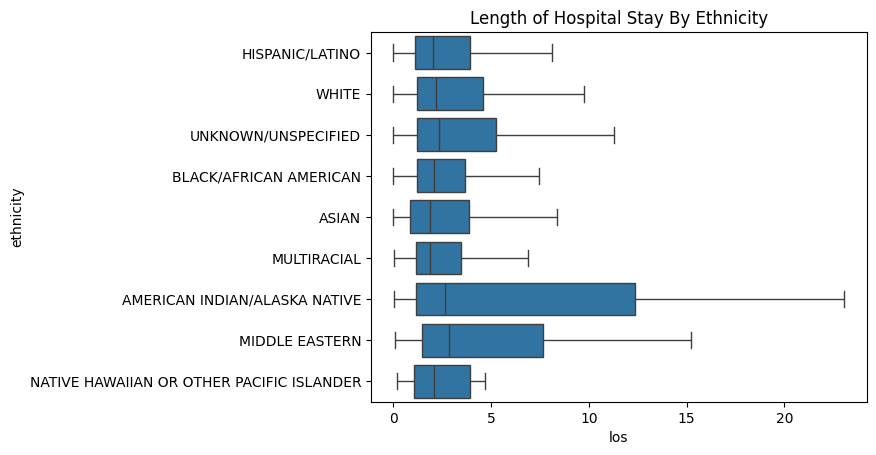

ethnicity  AMERICAN INDIAN/ALASKA NATIVE        ASIAN  BLACK/AFRICAN AMERICAN  \
los count                      75.000000  2950.000000            19486.000000   
    mean                       11.009259     4.630325                3.943561   
    std                        19.110542    10.203230                7.758510   
    min                         0.031500     0.001000                0.002500   
    25%                         1.141350     0.834075                1.183375   
    50%                         2.616700     1.855900                2.076600   
    75%                        12.357400     3.856400                3.683600   
    max                       100.785700   126.826100              171.622700   

ethnicity  HISPANIC/LATINO  MIDDLE EASTERN  MULTIRACIAL  \
los count      4537.000000      107.000000   196.000000   
    mean          4.092500        5.851239     3.791418   
    std           7.729398        7.706979     7.926326   
    min           0.001900        0.091800     0.022700   
    25%           1.107100        1.442400     1.148050   
    50%           2.013000        2.860900     1.872150   
    75%           3.905700        7.659400     3.455000   
    max         133.254200       36.947900    89.331900   

ethnicity  NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  UNKNOWN/UNSPECIFIED  \
los count                                  23.000000          9600.000000   
    mean                                    3.985683             5.672246   
    std                                     6.836700            10.477909   
    min                                     0.160900             0.001400   
    25%                                     1.055450             1.194000   
    50%                                     2.077400             2.350150   
    75%                                     3.917400             5.238375   
    max                                    32.679800           169.420200   

ethnicity         WHITE  
los count  72018.000000  
    mean       4.755757  
    std        8.443631  
    min        0.000100  
    25%        1.188125  
    50%        2.198800  
    75%        4.604600  
    max      173.072500

In [14]:
sns.histplot(data=df_b, y='ethnicity', hue='gender', multiple='stack')
plt.title('Ethnicity Distribution by Gender')
plt.show()

sns.barplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b, showfliers = False)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

df_b[['ethnicity', 'los']].groupby('ethnicity').describe().transpose()

The distribution of patient ethnicity was depicted by gender. There were no significant trends between men or women of a certain ethnicity being more present in the ICU.

Regarding the length of stay by patient ethnicity, there was no significant difference in the median length of stay, but several groups exhibited a longer length of stay compared to others. For example, the length of stay distribution for American Indian/Alaska Native patients are heavily right-skewed, meaning there were several extreme instances of longer stays. In particular, the average length of stay for an American Indian/Alaska Native patient was just over 11 days and 25% of patients had a length of stay between 12 and 100 days within this group. It is worthwhile to remember that each group exhibited several outliers that pull the length of stay distribution rightward.

Compared to a histogram with error bars, a box plot is a more representative way to display the data as quartile measurements and robust statistics such as the median can be immediately determined. This allows for an easier understanding of the data presented.

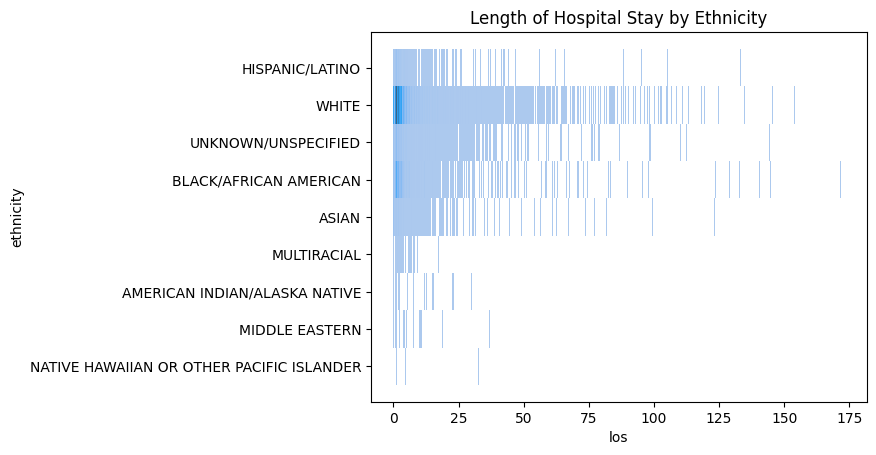

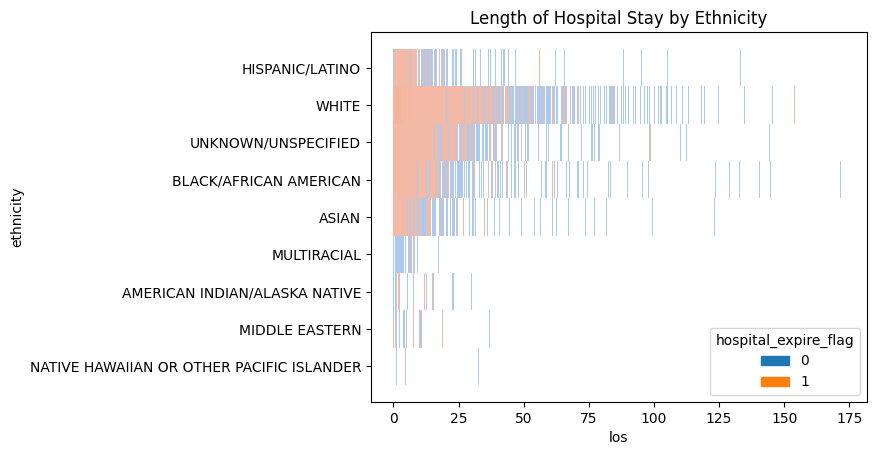

In [15]:
sns.histplot(data=df_b, y='ethnicity', x = 'los')
plt.title('Length of Hospital Stay by Ethnicity')
plt.show()

ax = sns.histplot(data=df_b, y='ethnicity', x = 'los', hue = 'hospital_expire_flag', multiple='stack')
sns.move_legend(ax, loc = 'lower right')
plt.title('Length of Hospital Stay by Ethnicity')
plt.show()

The above histograms display the frequency of each length of stay value across patient ethnicities. Additionally, the second plot describes whether the patient died within the care of the hospital or outside of the hospital. From the second plot, it is clear that most patients who die within the hospital have a shorter length of stay. This suggests that the diseases faced by these individuals were life-ending or untreatable at the point the patient was admitted to the ICU.

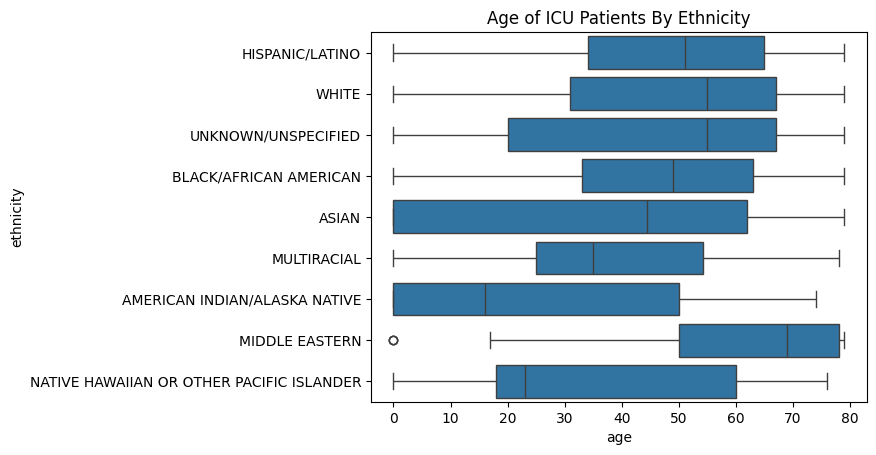

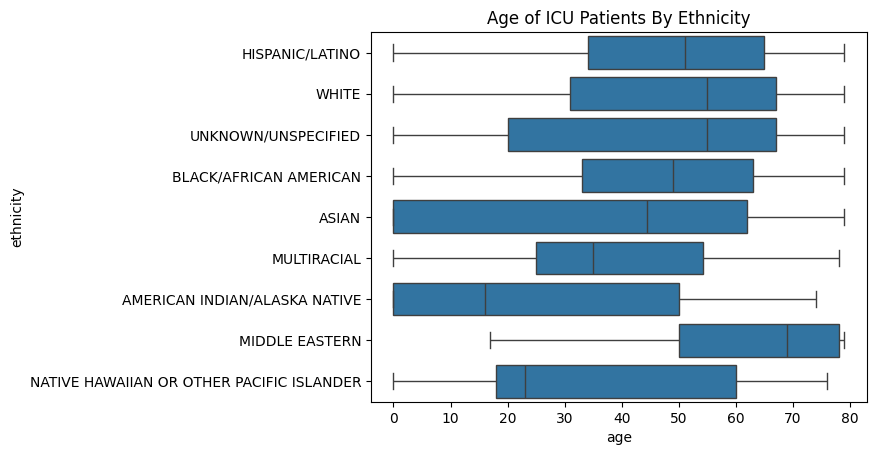

ethnicity  AMERICAN INDIAN/ALASKA NATIVE        ASIAN  BLACK/AFRICAN AMERICAN  \
age count                      75.000000  2950.000000            19486.000000   
    mean                       25.080000    37.467119               45.956225   
    std                        27.017392    28.812853               20.187057   
    min                         0.000000     0.000000                0.000000   
    25%                         0.000000     0.000000               33.000000   
    50%                        16.000000    44.500000               49.000000   
    75%                        50.000000    62.000000               63.000000   
    max                        74.000000    79.000000               79.000000   

ethnicity  HISPANIC/LATINO  MIDDLE EASTERN  MULTIRACIAL  \
age count      4537.000000      107.000000    196.00000   
    mean         47.199691       62.672897     37.97449   
    std          21.538546       19.989986     22.59463   
    min           0.000000        0.000000      0.00000   
    25%          34.000000       50.000000     25.00000   
    50%          51.000000       69.000000     35.00000   
    75%          65.000000       78.000000     54.25000   
    max          79.000000       79.000000     78.00000   

ethnicity  NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  UNKNOWN/UNSPECIFIED  \
age count                                  23.000000          9606.000000   
    mean                                   34.608696            46.634291   
    std                                    26.529125            25.285239   
    min                                     0.000000             0.000000   
    25%                                    18.000000            20.000000   
    50%                                    23.000000            55.000000   
    75%                                    60.000000            67.000000   
    max                                    76.000000            79.000000   

ethnicity         WHITE  
age count  72021.000000  
    mean      48.576846  
    std       23.385869  
    min        0.000000  
    25%       31.000000  
    50%       55.000000  
    75%       67.000000  
    max       79.000000

In [16]:
sns.boxplot(y='ethnicity', x='age', data=df_b)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='age', data=df_b, showfliers = False)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

df_b[['ethnicity', 'age']].groupby('ethnicity').describe().transpose()

The age of ICU patients vary significantly across each ethnicity. For instance, Middle Eastern patients have the highest average age at admittance ([placeholder]), whereas American Indian/Alaska Native patients have the lowest average age at admittance ([placeholder]). Unsurprisingly, the count of each ethnic group similarly varies; recall that the most common ethnicity of admitted patients was White followed by Black/African American, whose counts are above [placeholder] and [placeholder] patients, respectively. As patients with less frequent ethnicities are admitted, the results can easily become skewed or vary wildly with outliers. The majority of the age distributions are skewed left, suggesting that older patients are admitted to the ICU more frequently than their younger counterparts.

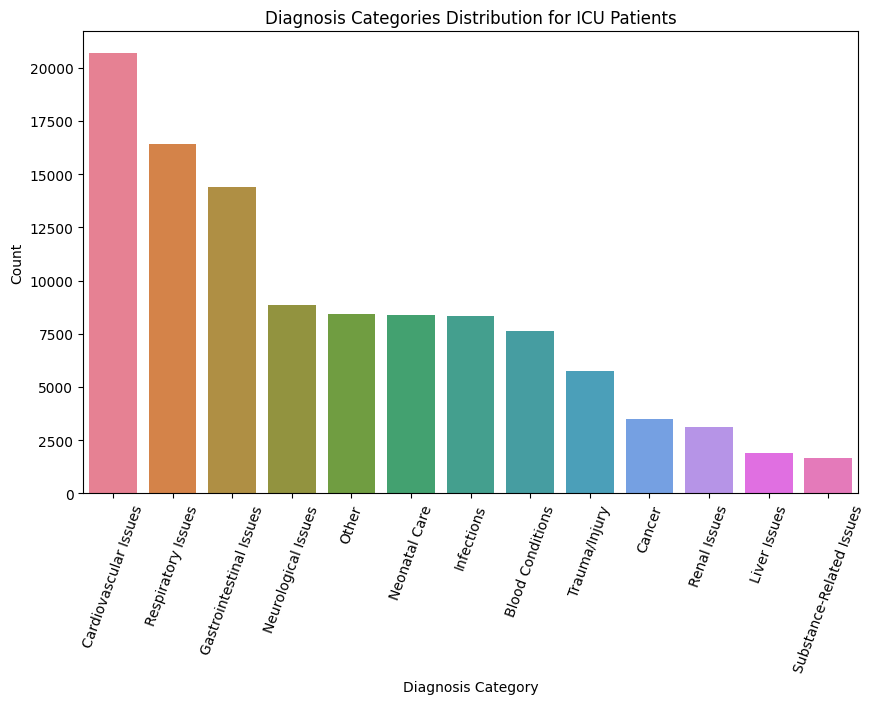

In [17]:
df_b['diagnosis_category'] = mapped_diagnosis(df_b['diagnosis'])
category_counts = df_b['diagnosis_category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue = category_counts.index)
plt.title('Diagnosis Categories Distribution for ICU Patients')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

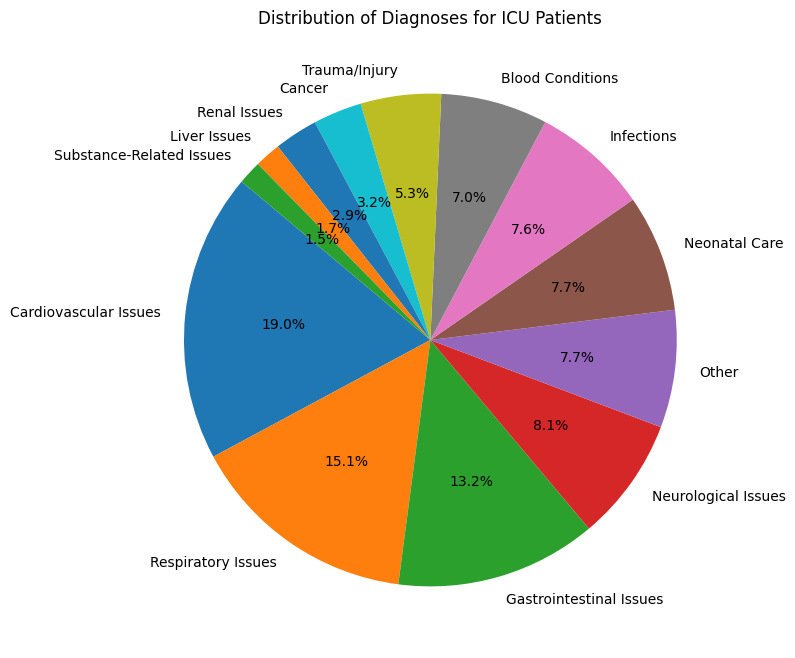

In [18]:
diagnosis_percentages = category_counts / category_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnoses for ICU Patients')
plt.show()

The bar plot and pie chart depict the distribution of patient diagnoses after admittance to the ICU. The most common diagnosis category is cardiovascular issues (19.0%), followed by respiratory issues (15.4%), gastrointestinal issues (13.2%), neurological issues (8.1%), and infections (7.7%). Cardiovascular issues include diagnoses such as myocardial infarctions (heart attacks), heart disease complications, and heart surgery. Respiratory issues include shortness of breath, asthma, and pneumonia. Gastrointestinal issues include appendicitis, hernias, and abdominal pain. Neurological issues include stroke or brain bleeds, concussions, and mental health crises. Infections include sepsis, urinary tract infections, and bacterial/fungal infections. Blood clotting issues were sorted in the "Blood Conditions" category.

In [ ]:
df_b['age_group'] = pd.cut(df_b['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])

age_diagnosis_counts = df_b.groupby(['age_group', 'diagnosis_category'], observed = False).size().unstack().fillna(0)
age_diagnosis_percents = age_diagnosis_counts.div(age_diagnosis_counts.sum(axis=1), axis=0) * 100

age_diagnosis_counts.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Diagnosis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_diagnosis_percents.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Diagnosis by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

The bar plots separate ICU patients into one of four age groups (0-20, 21-40, 41-60, 61-79). The stacked bar plot displays the diagnoses within each age group, with the largest section being the most common diagnosis for that age group. The stacked bar plot using percentages normalizes all groups to 100% and shows the relative frequency of each diagnosis category.

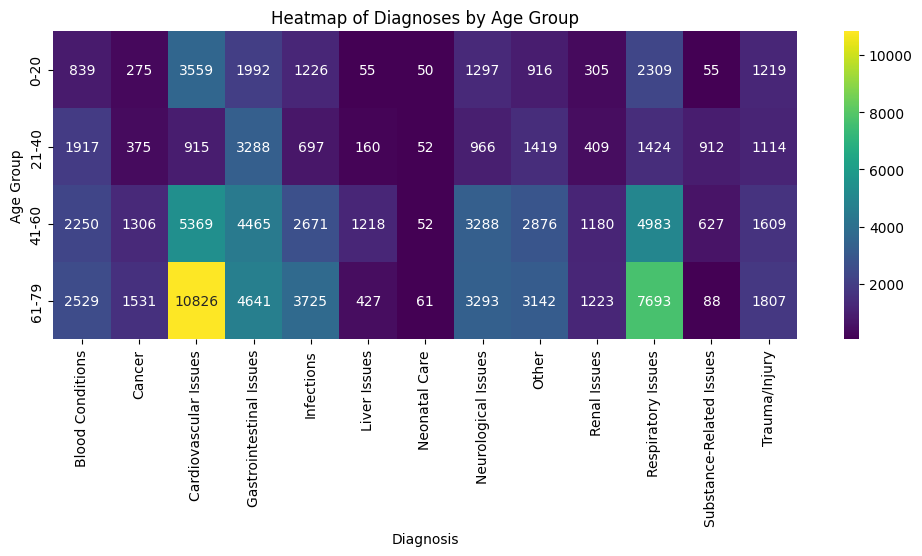

In [19]:
heatmap_data = df_b.pivot_table(index='age_group', columns='diagnosis_category', aggfunc='size', fill_value=0, observed = False)

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Diagnoses by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')
plt.show()

The above heatmap clearly depicts the most common diagnosis category for each age group. For instance, young adults aged 0-20 most often are admitted to the ICU for trauma or injury-related problems. Gun shot wounds and car accidents are the leading causes of death for children and teens, suggesting that trauma and injuries are the most common reasons for children and teens to be admitted to the ICU ([Johns Hopkins Bloomberg School of Public Health, 2024](https://publichealth.jhu.edu/2024/guns-remain-leading-cause-of-death-for-children-and-teens)).

In the elderly (aged 61-79), the most common health-related incidents are cardiovascular and respiratory issues.

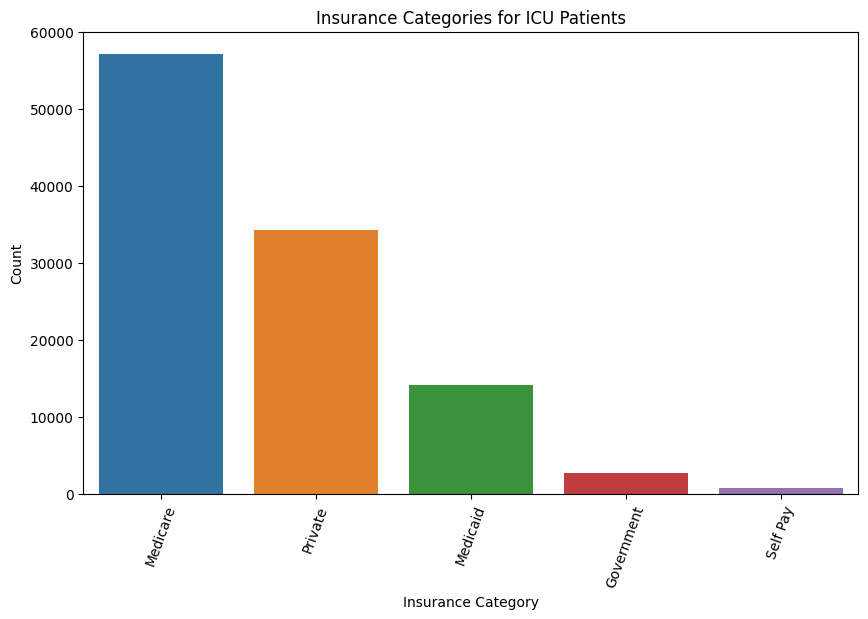

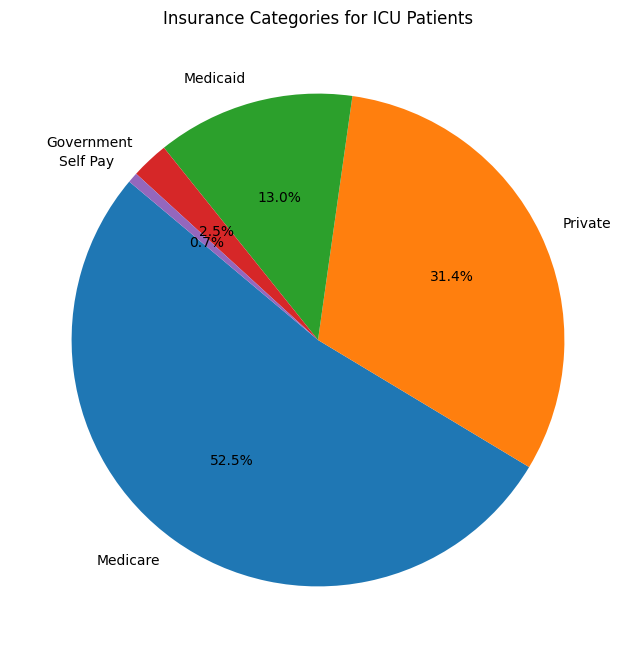

In [20]:
insurance_counts = df_b['insurance'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=insurance_counts.index, y=insurance_counts.values, hue = insurance_counts.index)
plt.title('Insurance Categories for ICU Patients')
plt.xlabel('Insurance Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Insurance Categories for ICU Patients')
plt.show()

The majority of ICU patients pay for their hospital admittance using Medicare (52.5%) or private insurance (31.4%). It is worthwhile to remember that, for dependents aged 0-26, there may be repeats of insurances due to family. Very few patients pay out-of-pocket for their hospital stay (0.7%).

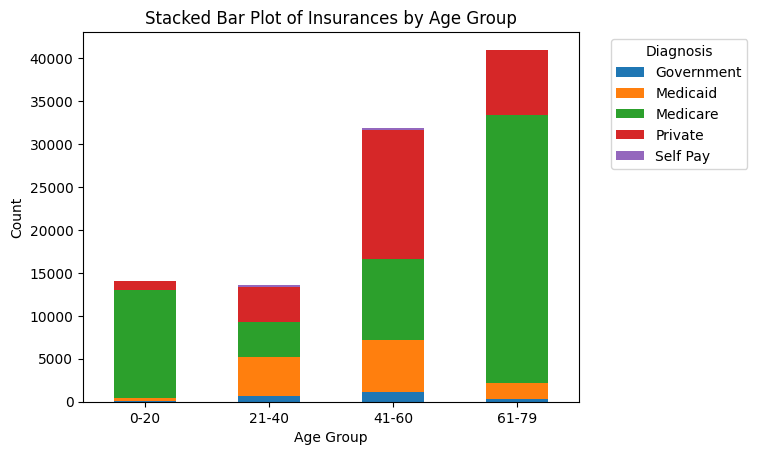

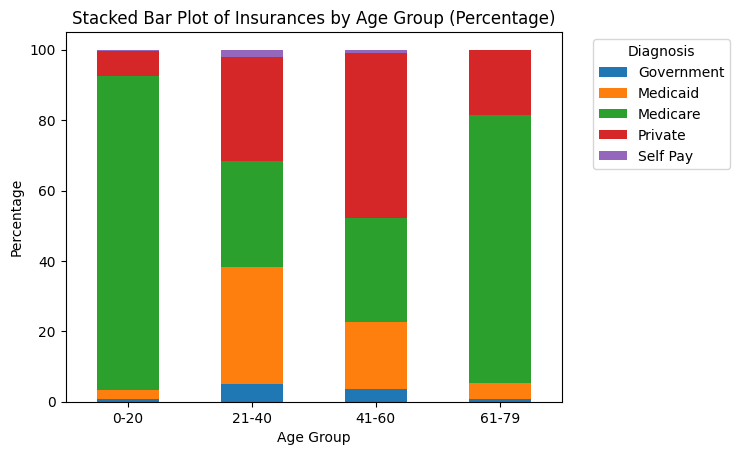

In [21]:
age_insurance_counts = df_b.groupby(['age_group', 'insurance'], observed = False).size().unstack().fillna(0)
age_insurance_percents = age_insurance_counts.div(age_insurance_counts.sum(axis=1), axis=0) * 100

age_insurance_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Insurances by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Insurance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_insurance_percents.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Insurances by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Insurance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

The stacked bar plots represent the insurance categories for each age group. As noted previously, young adults (aged 0-20) are likely on their parents plan or have become independent with their own health insurance. Notably, the majority of the middle range of adults have private insurance, whereas the majority of elderly adults rely on Medicare.

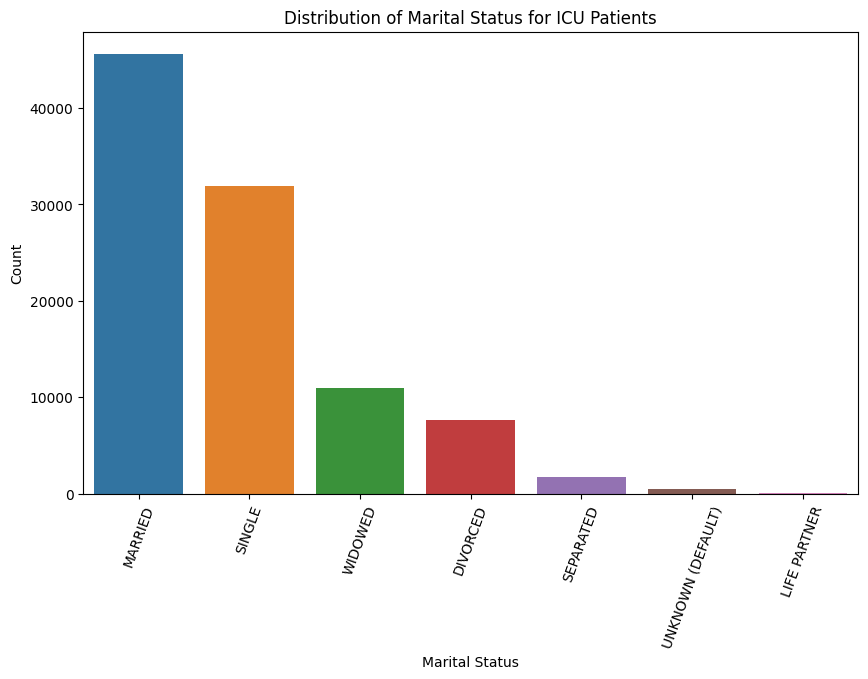

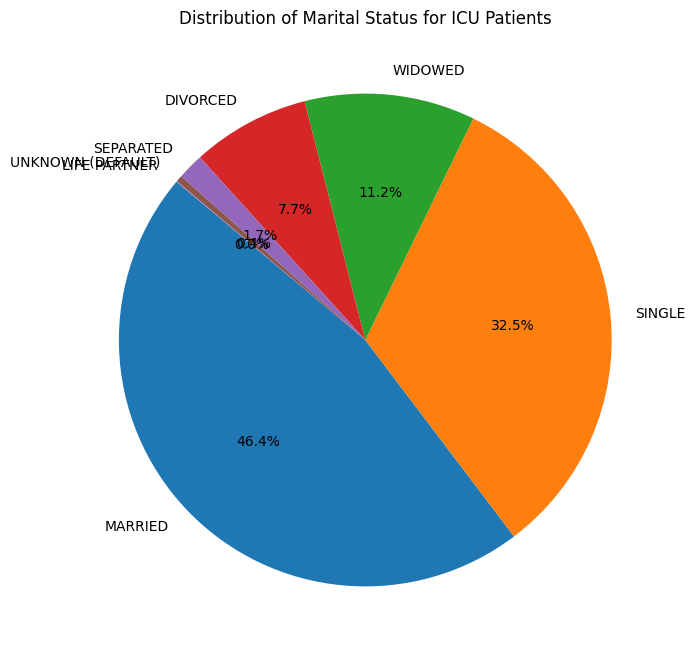

In [22]:
marital_counts = df_b['marital_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, hue = marital_counts.index)
plt.title('Distribution of Marital Status for ICU Patients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Marital Status for ICU Patients')
plt.show()

ICU patients most generally fall into two categories: married (46.4%) or single (32.5%). However, additional marital statuses (such as widowed, divorced, separated, etc.) describe 21.1% of patients.

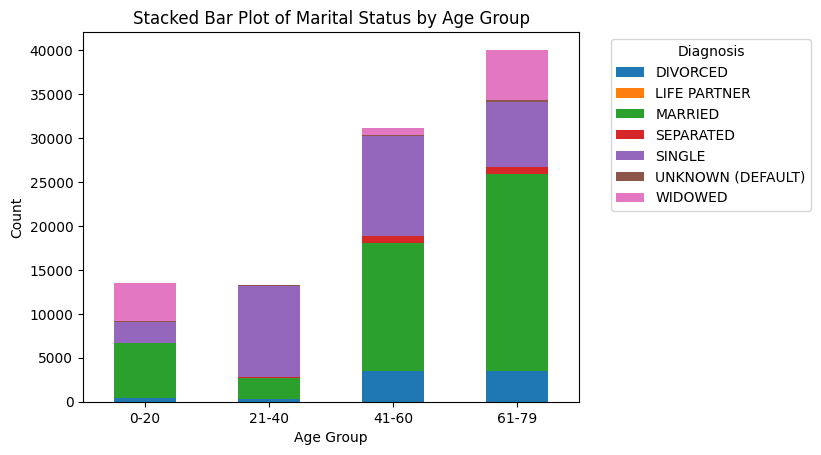

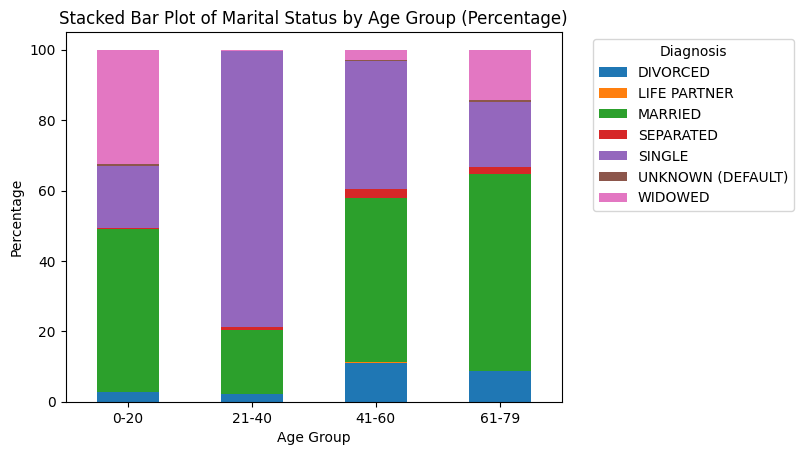

In [23]:
age_marital_counts = df_b.groupby(['age_group', 'marital_status'], observed = False).size().unstack().fillna(0)
age_marital_percents = age_marital_counts.div(age_marital_counts.sum(axis=1), axis=0) * 100

age_marital_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_marital_percents.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Marital Status by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

The marital status varies between each age group. For most age groups, the most common marital status is "married" with the exception of the 21-40 year olds, whose most common marital status is "single."

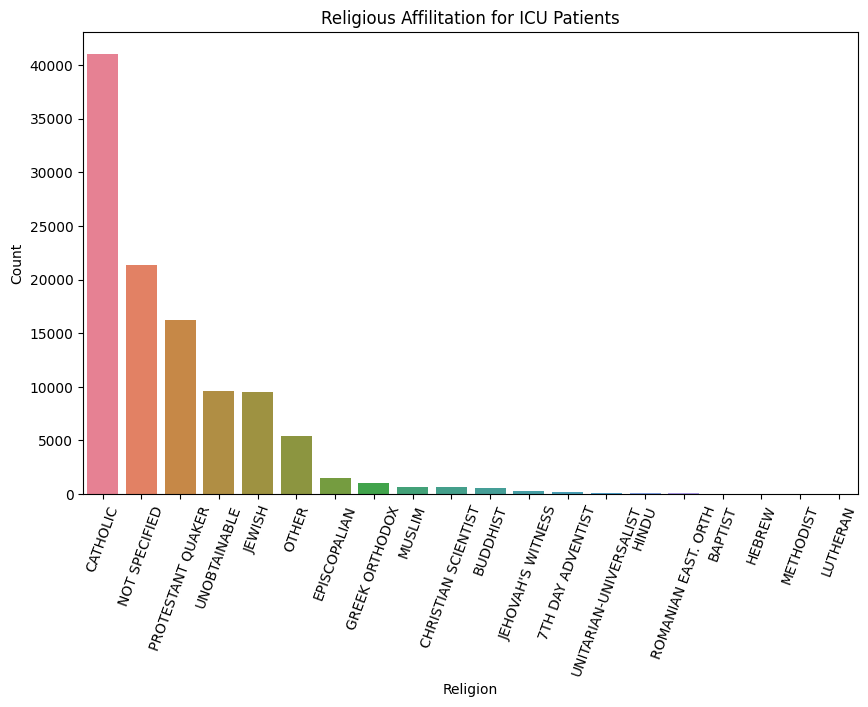

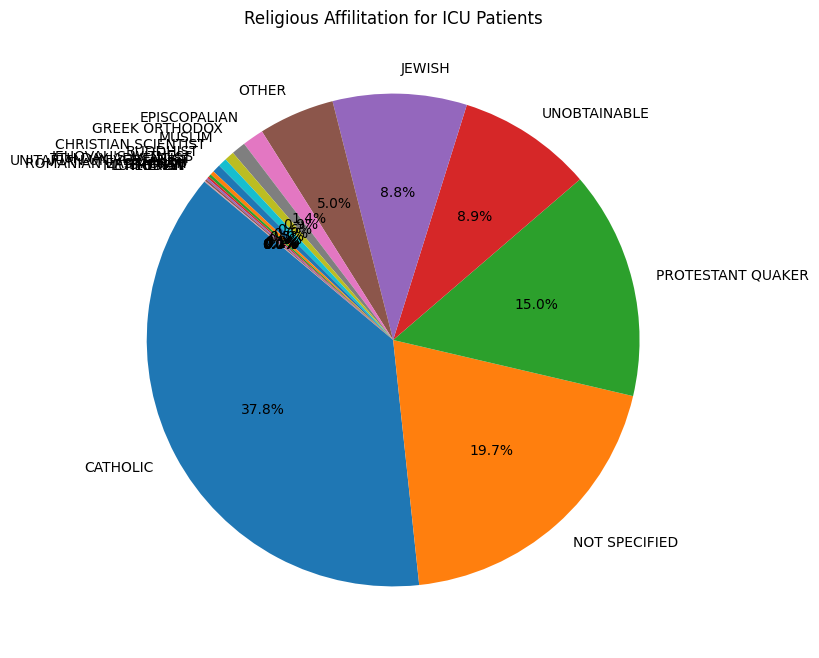

In [24]:
religion_counts = df_b['religion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=religion_counts.index, y=religion_counts.values, hue = religion_counts.index)
plt.title('Religious Affilitation for ICU Patients')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Religious Affilitation for ICU Patients')
plt.show()

Religious affiliation takes on many forms. The data was not categorized or manipulated to preserve the differences between each religion. The most common selection for religous affiliation is Catholic (37.8%) followed by no selection (19.7%).

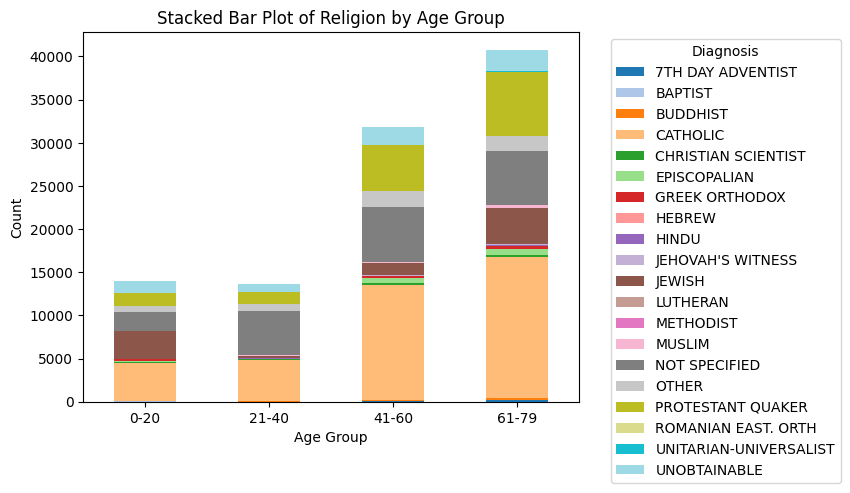

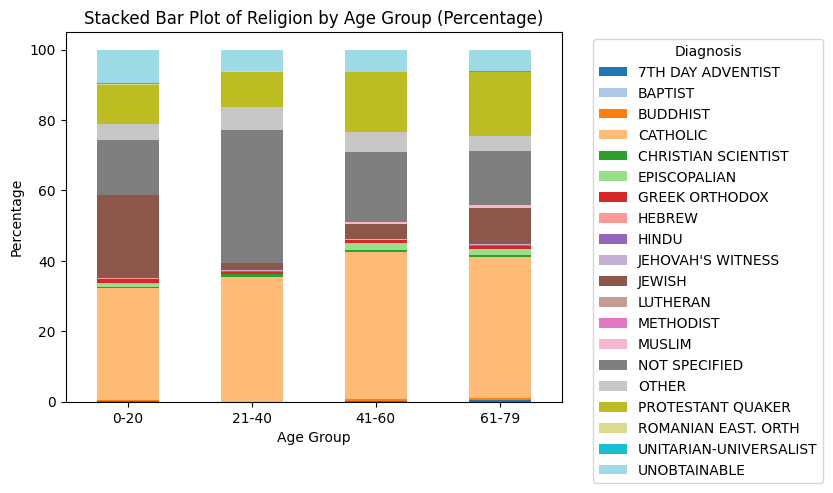

In [25]:
age_religion_counts = df_b.groupby(['age_group', 'religion'], observed = False).size().unstack().fillna(0)
age_religion_percents = age_religion_counts.div(age_religion_counts.sum(axis=1), axis=0) * 100

age_religion_counts.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Religion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_religion_percents.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Religion by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

The stacked bar plots depict the religion by age group. The most common religious affiliation across all ages is Catholic, though patients aged 21-40 have a higher proportion of unspecified religions.

### Time Analysis

In [29]:
df_c = query_c()

print(df_c.head(2))
df_c.info()

             admittime insurance      religion marital_status ethnicity  \
0  2196-04-09 12:26:00   Private  UNOBTAINABLE        MARRIED     WHITE   
1  2153-09-03 07:15:00  Medicare      CATHOLIC        MARRIED     WHITE   

                                           diagnosis  hospital_expire_flag  
0                            BENZODIAZEPINE OVERDOSE                     0  
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   admittime             58976 non-null  object
 1   insurance             58976 non-null  object
 2   religion              58518 non-null  object
 3   marital_status        48848 non-null  object
 4   ethnicity             58976 non-null  object
 5   diagnosis             58951 non-null  object
 6   hospital_expire_flag  58976 no

Notice the error in computing the admission time in the dataset. For analysis purposes, years such as "2149" were converted to their 20th century counterpart, like "1949". The addition of a datetime column to our query allows for time series analysis to be conducted, and how time of day or season influences ICU admission rates.

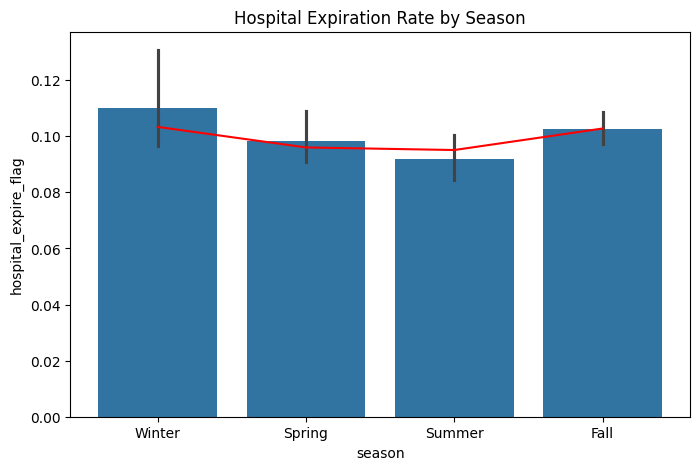

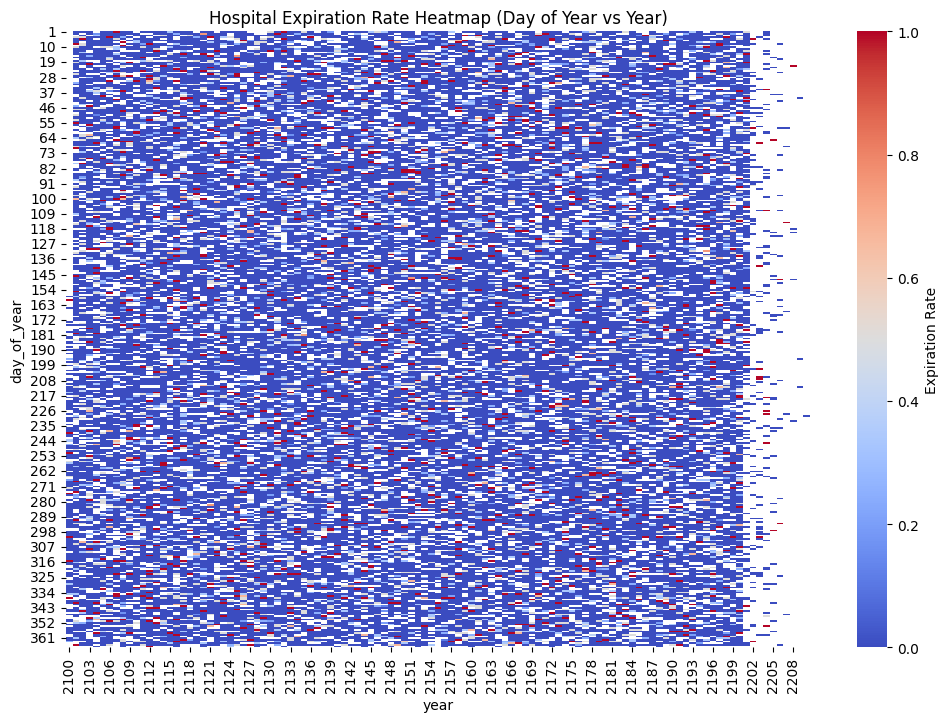

   season  Total Patients  Expired Patients  Percent Mortality Rate (%)
0  Winter           14613              1510                   10.333265
1  Spring           14634              1405                    9.600929
2  Summer           15143              1440                    9.509344
3    Fall           14586              1499                   10.276978


In [30]:
df_c['year'] = pd.to_datetime(df_c['admittime']).dt.year
df_c['month'] = pd.to_datetime(df_c['admittime']).dt.month
df_c['day_of_year'] = pd.to_datetime(df_c['admittime']).dt.dayofyear
df_c['season'] = pd.cut(df_c['month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
day_year_pivot = df_c.pivot_table(index='day_of_year', columns='year', values='hospital_expire_flag', aggfunc='mean')

seasonal_expire_rate_yearly = df_c.groupby(['year', 'season'], observed = False)['hospital_expire_flag'].mean().reset_index()
seasonal_expire_rate = df_c.groupby('season', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='season', y='hospital_expire_flag', data=seasonal_expire_rate_yearly)
sns.lineplot(x = 'season', y = 'hospital_expire_flag', data = seasonal_expire_rate, color = 'red')
plt.title('Hospital Expiration Rate by Season')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(day_year_pivot, cmap='coolwarm', cbar_kws={'label': 'Expiration Rate'})
plt.title('Hospital Expiration Rate Heatmap (Day of Year vs Year)')
plt.show()

seasonal_summary = df_c.groupby('season', observed = False).agg(
    total_patients=('hospital_expire_flag', 'size'),  # patients per season
    expired_patients=('hospital_expire_flag', 'sum')  # expired patients per season
).reset_index()
seasonal_summary['mortality_rate'] = (seasonal_summary['expired_patients'] / seasonal_summary['total_patients']) * 100

print(seasonal_summary[['season', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

There do not appear to be any statistically significant differences in average expiry rate in the hospital for ICU patients. However, it appears that there is a slight decrease in hospital expiry rate during the summer.

The elderly are susceptible to daylight savings, as the risk of mortality increases during the transition to autumnal daylight saving time ([Zhao et al., 2024](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10921520/)). This suggests that the elderly are more likely to pass in the spring or fall seasons compared to the summer and winter seasons.

The hospital expiry rate was greatest in the winter; this may be due to the influx of seasonal infections such as the common cold and influenza, or increased risk of cardiovascular issues ([Falagas et al., 2009](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2761439/)).

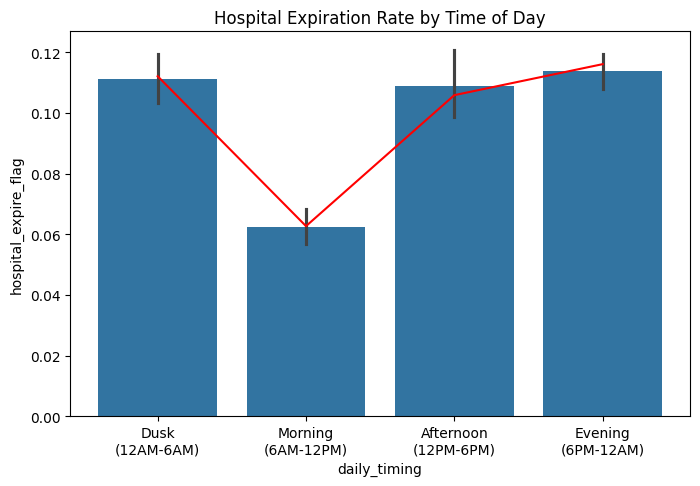

            daily_timing  Total Patients  Expired Patients  \
0       Dusk\n(12AM-6AM)            9973              1118   
1    Morning\n(6AM-12PM)           14129               886   
2  Afternoon\n(12PM-6PM)           19429              2057   
3    Evening\n(6PM-12AM)           15445              1793   

   Percent Mortality Rate (%)  
0                   11.210268  
1                    6.270791  
2                   10.587266  
3                   11.608935  


In [32]:
df_c['hour'] = pd.to_datetime(df_c['admittime']).dt.hour
df_c['daily_timing'] = pd.cut(df_c['hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk\n(12AM-6AM)', 'Morning\n(6AM-12PM)', 'Afternoon\n(12PM-6PM)', 'Evening\n(6PM-12AM)'], 
                        include_lowest=True)

daily_expire_rate_yearly = df_c.groupby(['year', 'daily_timing'], observed = False)['hospital_expire_flag'].mean().reset_index()
daily_expire_rate = df_c.groupby('daily_timing', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize = (8,5))
sns.barplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate_yearly)
sns.lineplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate, color = 'red')
plt.title('Hospital Expiration Rate by Time of Day')
plt.show()

daily_summary = df_c.groupby('daily_timing', observed = False).agg(
    total_patients = ('hospital_expire_flag', 'size'),
    expired_patients = ('hospital_expire_flag', 'sum')
).reset_index()
daily_summary['mortality_rate'] = daily_summary['expired_patients'] / daily_summary['total_patients'] * 100

print(daily_summary[['daily_timing', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

The fewest proportion of patients in the ICU expired in the morning between the hours of 6AM and 12PM. This is supported by the higher likelihood of passing away during other times of the day. Perhaps unsurprisingly, most deaths take place during the evening and dusk hours.

According to disease-related deaths in New York City in 1979, there was a stark increase in death rate between 2AM and 8AM along with a smaller peak at 6PM ([Mitler et al., 1987](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2701164/)). This models the observed death rates by time of day.

### Predictions of Patient Readmission

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [27]:
df_d = query_d()
df_d['diagnosis_category'] = mapped_diagnosis(df_d['diagnosis'])

print(df_d.head(2))
df_d.info()

  gender  age admission_type            admittime            dischtime  \
0      M   40      EMERGENCY  2170-11-05 11:04:00  2170-11-27 18:00:00   
1      M   80       ELECTIVE  2128-06-23 18:26:00  2128-06-27 12:31:00   

                                      diagnosis     los  readmission_flag  \
0                      SEPSIS;PILONIDAL ABSCESS  3.2788                 0   
1  CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT  2.8939                 0   

      diagnosis_category  
0             Infections  
1  Cardiovascular Issues  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54923 entries, 0 to 54922
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              54923 non-null  object 
 1   age                 54923 non-null  int64  
 2   admission_type      54923 non-null  object 
 3   admittime           54923 non-null  object 
 4   dischtime           54923 non-null  object 
 5   diagnosi

#### Predictions of Patient Readmission: Preprocessing Data

In [28]:
df_d['admit_month'] = pd.to_datetime(df_d['admittime']).dt.month
df_d['admit_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['admit_season'] = pd.cut(df_d['admit_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['admit_hour'] = pd.to_datetime(df_d['admittime']).dt.hour
df_d['admit_timing'] = pd.cut(df_d['admit_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d['disch_month'] = pd.to_datetime(df_d['dischtime']).dt.month
df_d['disch_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['disch_season'] = pd.cut(df_d['disch_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['disch_hour'] = pd.to_datetime(df_d['dischtime']).dt.hour
df_d['disch_timing'] = pd.cut(df_d['disch_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d = df_d.drop(labels = ['admittime', 'dischtime', 'diagnosis', 'admit_month', 'disch_month', 'admit_hour', 'disch_hour'], axis = 1)
df_d = pd.get_dummies(df_d, columns = ['admission_type', 'gender', 'diagnosis_category', 'admit_timing', 'disch_timing', 'admit_season', 'disch_season'])

In [29]:
df_d_no_nan = df_d[df_d['los'].notnull()]

X = df_d_no_nan.drop('readmission_flag', axis=1)
y = df_d_no_nan['readmission_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

#### Predictions of Patient Readmission: Raw Data

In [30]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cholesky', 'liblinear'],
    'class_weight': ['balanced', None]
}

lr = GridSearchCV(LogisticRegression(penalty = 'l2', max_iter = 100000), param_grid, scoring = 'f1')
lr.fit(X_train, y_train)

print("Best hyperparameters used in this logistic regression model:")
print(lr.best_params_)

Best hyperparameters used in this logistic regression model:
{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [33]:
lr = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 100000, solver = 'liblinear', class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score:", f1_scores.mean())

[[6781 6066]
 [ 295  587]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     12847
           1       0.09      0.67      0.16       882

    accuracy                           0.54     13729
   macro avg       0.52      0.60      0.42     13729
weighted avg       0.90      0.54      0.65     13729

Average F1 score: 0.15744850062638047


In [31]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'class_weight': ['balanced', None]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_train, y_train)

print("Best hyperparameters used in this decision tree model:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


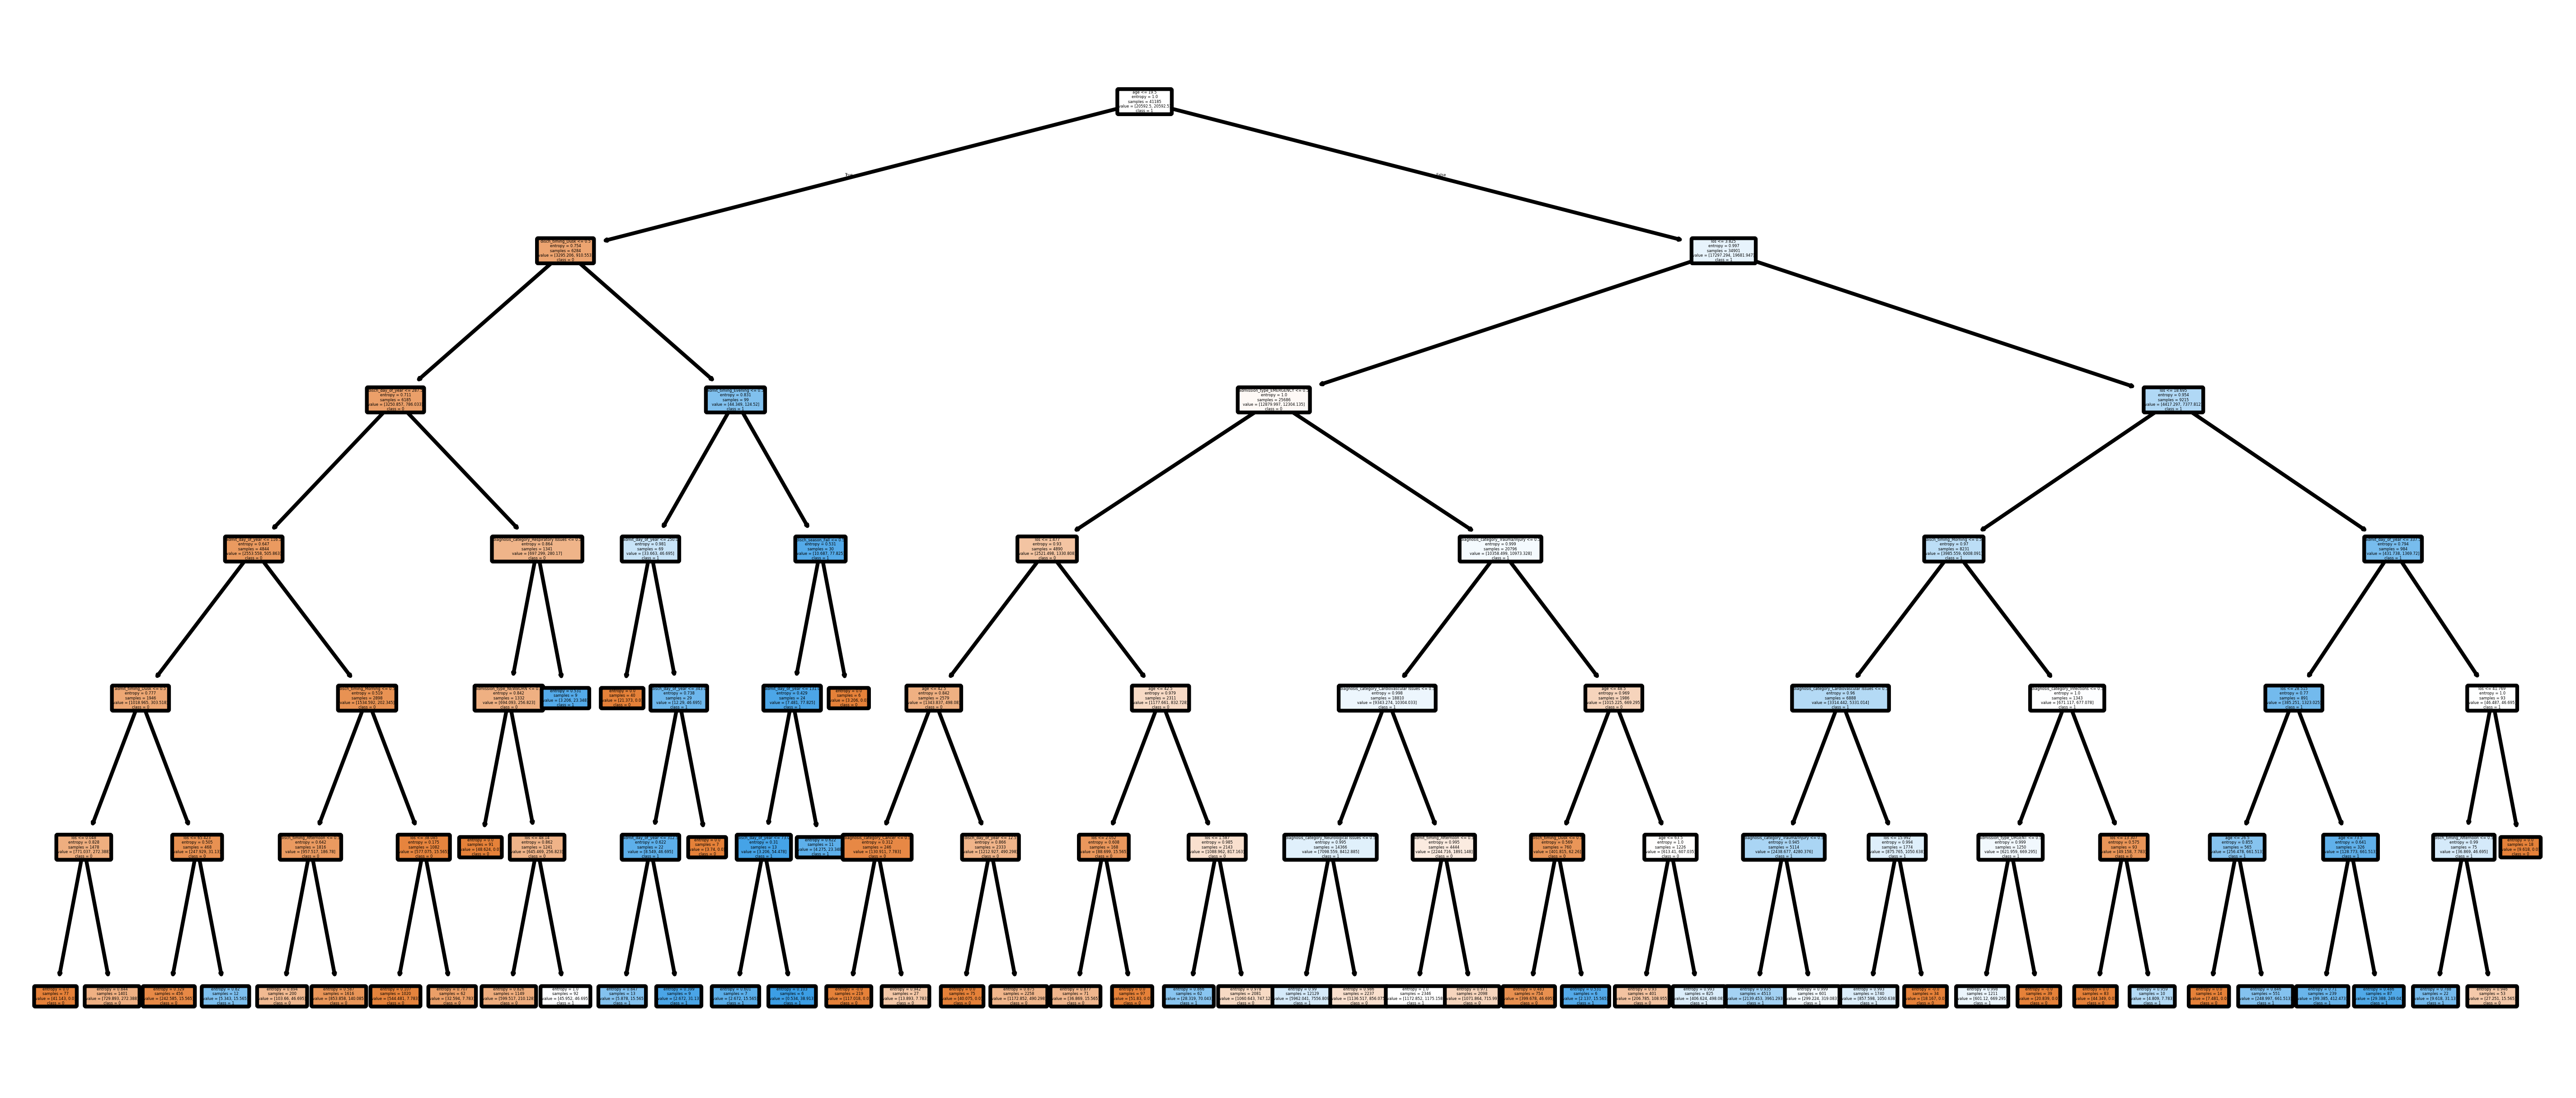

[[5355 7492]
 [ 182  700]]
              precision    recall  f1-score   support

           0       0.97      0.42      0.58     12847
           1       0.09      0.79      0.15       882

    accuracy                           0.44     13729
   macro avg       0.53      0.61      0.37     13729
weighted avg       0.91      0.44      0.56     13729

Average F1 score: 0.15337581932596028


In [34]:
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 6,
                             min_samples_leaf = 6,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = 'balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score:", f1_scores.mean())

In [32]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'class_weight': ['balanced', None]
}

rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
rf.fit(X_train, y_train)

print("Best hyperparameters used in this random forest model:")
print(rf.best_params_)

Best hyperparameters used in this random forest model:
{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}


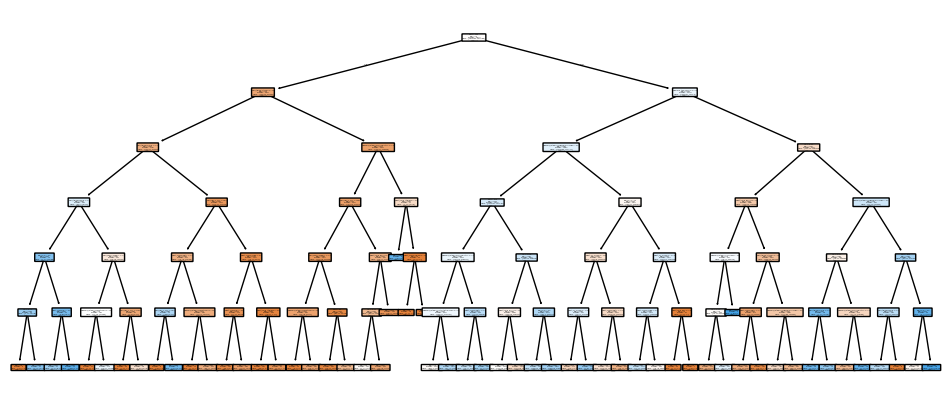

[[5967 6880]
 [ 215  667]]
              precision    recall  f1-score   support

           0       0.97      0.46      0.63     12847
           1       0.09      0.76      0.16       882

    accuracy                           0.48     13729
   macro avg       0.53      0.61      0.39     13729
weighted avg       0.91      0.48      0.60     13729

Average F1 score: 0.15745150077538703


In [40]:
rf = RandomForestClassifier(max_depth = 6, min_samples_leaf = 4, min_samples_split = 10, random_state = 42, class_weight = 'balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

plt.figure(figsize = (12,5))
plot_tree(rf.estimators_[42], filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score:", f1_scores.mean())

#### Predictions of Patient Readmission: Oversampling Readmitted Patients

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [41]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cholesky', 'liblinear']
}

lr = GridSearchCV(LogisticRegression(penalty = 'l2', max_iter = 100000), param_grid, scoring = 'f1')
lr.fit(X_res, y_res)

print("Best hyperparameters used in this logistic regression model:")
print(lr.best_params_)

Best hyperparameters used in this logistic regression model:
{'C': 10, 'solver': 'lbfgs'}


In [44]:
lr = LogisticRegression(C = 10, penalty = 'l2', max_iter = 100000, solver = 'lbfgs', class_weight = None)
lr.fit(X_res, y_res)

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(lr, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score with oversampling:", f1_scores_res.mean())

[[12845     2]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score with oversampling: 0.9415990253605562


In [42]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_res, y_res)

print("Best hyperparameters used in this decision tree model:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


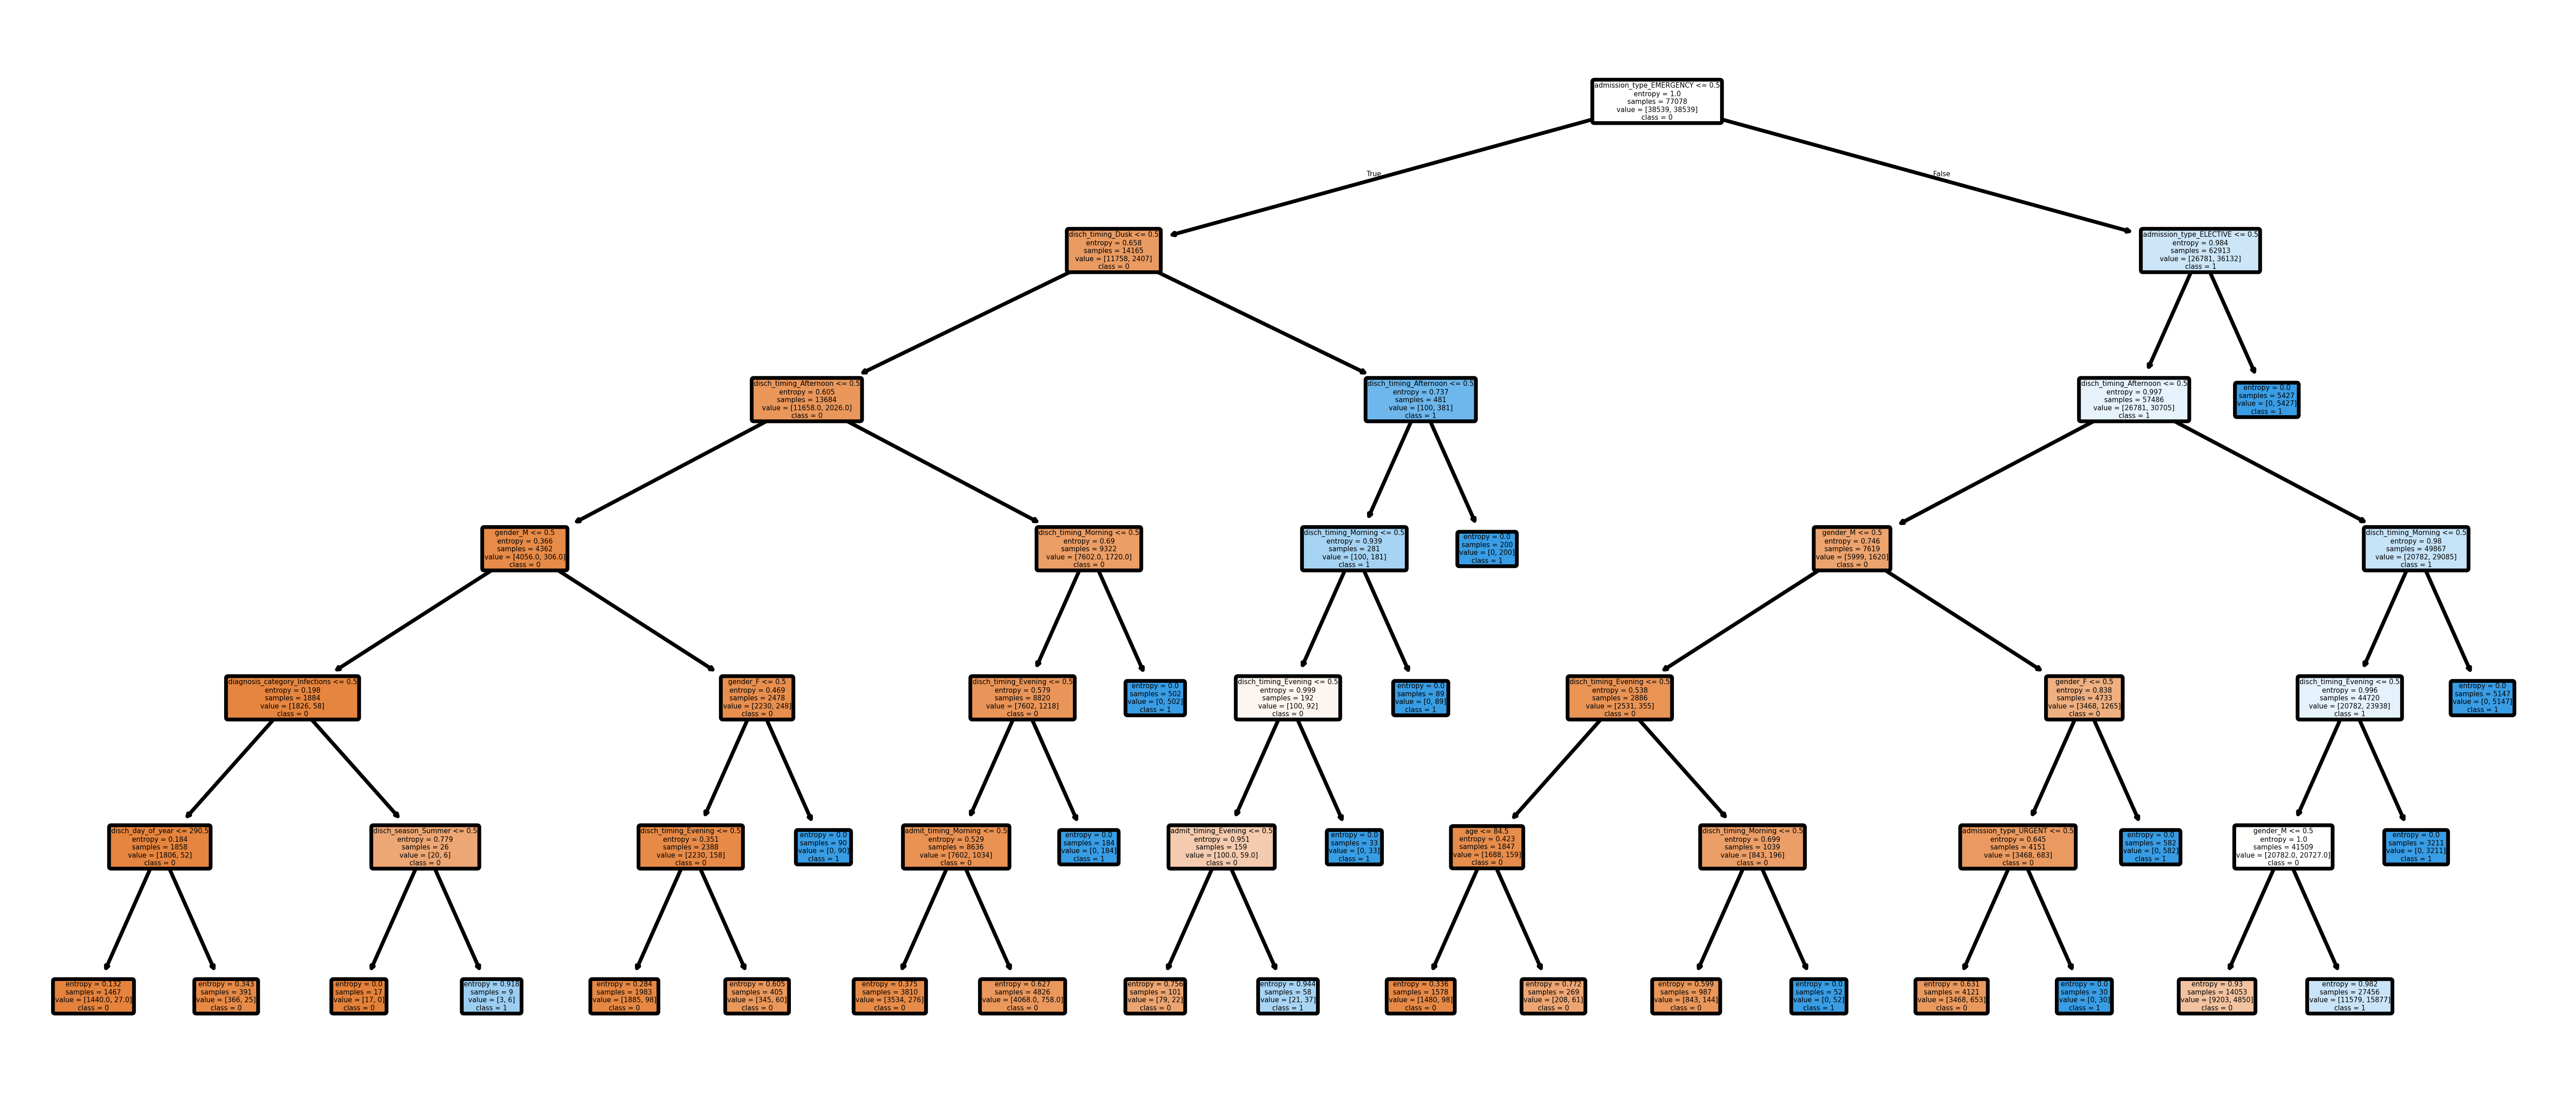

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score with oversampling: 0.7681105517170794


In [45]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 6, min_samples_split = 2, random_state = 42, class_weight = None)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_res.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score with oversampling:", f1_scores_res.mean())

In [43]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf = GridSearchCV(RandomForestClassifier(random_state = 42, class_weight = None), param_grid = params, cv = 10, scoring = 'f1')
rf.fit(X_res, y_res)

print("Best hyperparameters used in this random forest model:")
print(rf.best_params_)

Best hyperparameters used in this random forest model:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


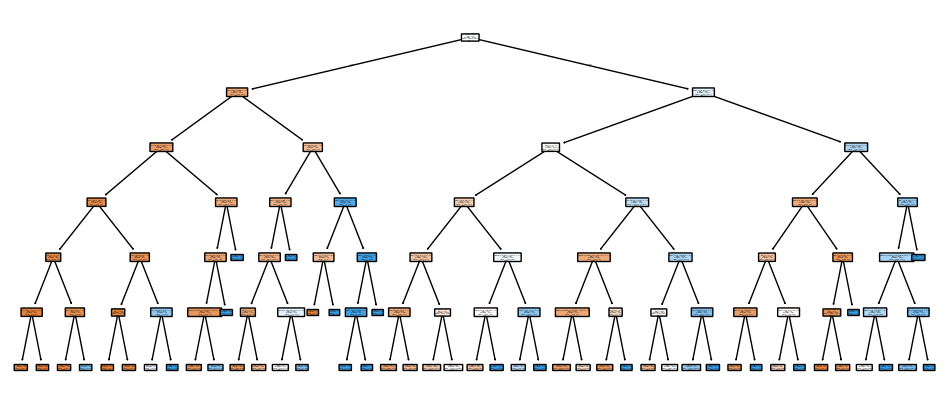

[[12269   578]
 [  806    76]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12847
           1       0.12      0.09      0.10       882

    accuracy                           0.90     13729
   macro avg       0.53      0.52      0.52     13729
weighted avg       0.89      0.90      0.89     13729

Average F1 score with oversampling: 0.8863018169707912


In [46]:
rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=1, min_samples_split=2, class_weight=None)
rf.fit(X_res, y_res)

y_pred = rf.predict(X_test)

plt.figure(figsize = (12,5))
plot_tree(rf.estimators_[42], filled = True, feature_names = X_res.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(rf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score with oversampling:", f1_scores_res.mean())

#### Predictions of Patient Readmission: Oversampling Readmitted Patients and Undersampling Non-Readmitted Patients

In [47]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy = 1.0, random_state = 42)
X_resampled, y_resampled = undersample.fit_resample(X_res, y_res)

In [48]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cholesky', 'liblinear']
}

lr = GridSearchCV(LogisticRegression(penalty = 'l2', max_iter = 100000, class_weight = None), param_grid, scoring = 'f1')
lr.fit(X_resampled, y_resampled)

print("Best hyperparameters used in this logistic regression model:")
print(lr.best_params_)

Best hyperparameters used in this logistic regression model:
{'C': 100, 'solver': 'lbfgs'}


In [51]:
lr = LogisticRegression(C = 100, penalty = 'l2', max_iter = 100000, solver = 'lbfgs', class_weight = None)
lr.fit(X_resampled, y_resampled)

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score with undersampling and oversampling:", f1_scores_res.mean())

[[12845     2]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score with undersampling and oversampling: 0.9475010069592985


In [49]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_resampled, y_resampled)

print("Best hyperparameters used in this decision tree model:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


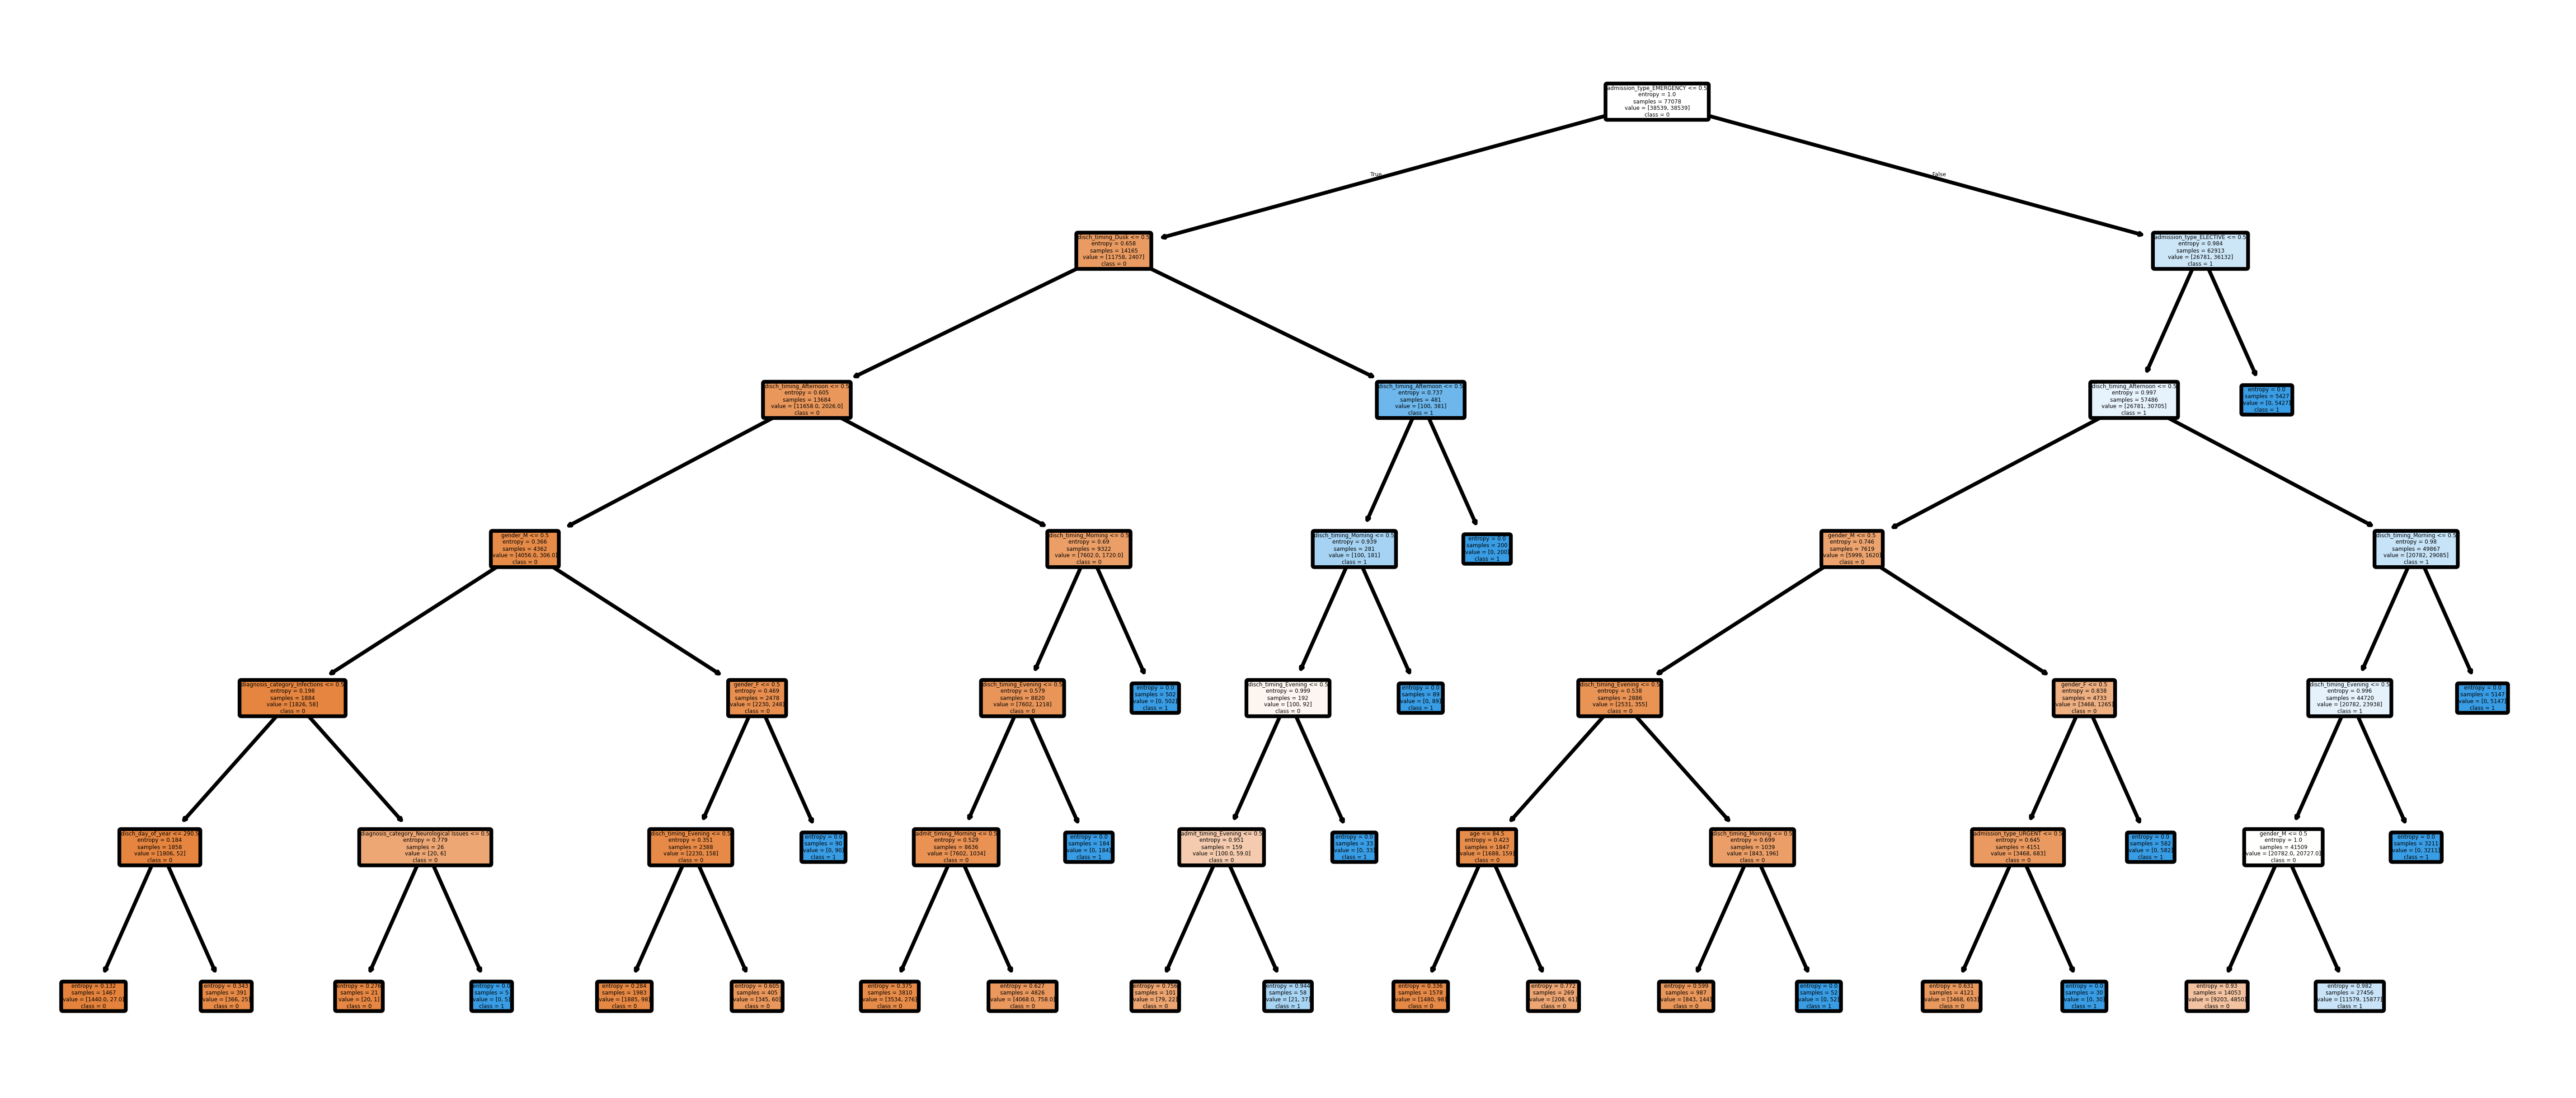

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score with undersampling and oversampling: 0.7703291565268716


In [52]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 1, min_samples_split = 2, random_state = 42, class_weight = None)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_resampled.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score with undersampling and oversampling:", f1_scores_res.mean())

In [50]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf = GridSearchCV(RandomForestClassifier(random_state = 42, class_weight = None), param_grid = params, cv = 10, scoring = 'f1')
rf.fit(X_resampled, y_resampled)

print("Best hyperparameters used in this random forest model:")
print(rf.best_params_)

Best hyperparameters used in this random forest model:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


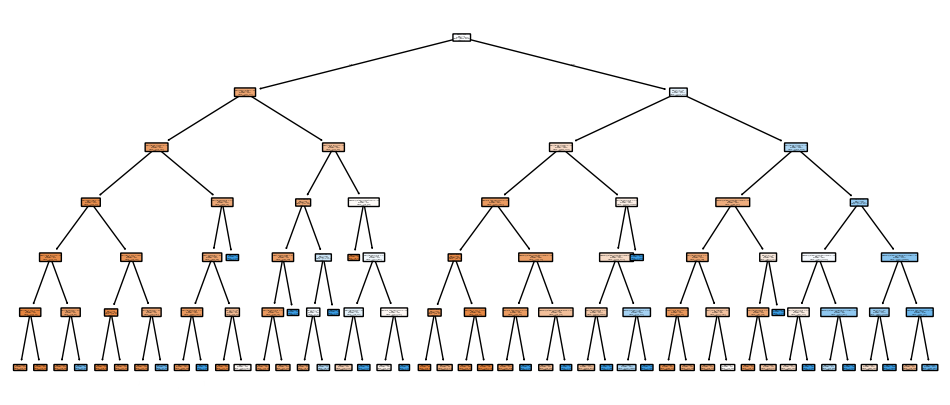

[[12067   780]
 [  791    91]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12847
           1       0.10      0.10      0.10       882

    accuracy                           0.89     13729
   macro avg       0.52      0.52      0.52     13729
weighted avg       0.88      0.89      0.89     13729

Average F1 score with undersampling and oversampling: 0.8932566755144202


In [53]:
rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=4, min_samples_split=2, class_weight=None)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

plt.figure(figsize = (12,5))
plot_tree(rf.estimators_[42], filled = True, feature_names = X_resampled.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score with undersampling and oversampling:", f1_scores_res.mean())

#### Predictions of Patient Readmission: Summary of Model Behavior

In [54]:
print("Summary of average F1 scores:")
df = pd.DataFrame(
    data = {
        "Logistic Regression": [0.157, 0.942, 0.948],
        "Decision Tree": [0.153, 0.768, 0.770],
        "Random Forest": [0.157, 0.886, 0.893]
    },
    index = ['Raw Data', 'SMOTE: Oversampling 1s', 'SMOTE: Undersampling 0s']
)
print(df.to_markdown(stralign = 'center', numalign = 'center'))

Summary of average F1 scores:
|                         |  Logistic Regression  |  Decision Tree  |  Random Forest  |
|:-----------------------:|:---------------------:|:---------------:|:---------------:|
|        Raw Data         |         0.157         |      0.153      |      0.157      |
| SMOTE: Oversampling 1s  |         0.942         |      0.768      |      0.886      |
| SMOTE: Undersampling 0s |         0.948         |      0.77       |      0.893      |


In [55]:
print("Summary of average accuracy:")
df = pd.DataFrame(
    data = {
        "Logistic Regression": ['54%', '94%', '94%'],
        "Decision Tree": ['44%', '68%', '68%'],
        "Random Forest": ['48%', '90%', '89%']
    },
    index = ['Raw Data', 'SMOTE: Oversampling 1s', 'SMOTE: Undersampling 0s']
)
print(df.to_markdown(stralign = 'center', numalign = 'center'))

Summary of average accuracy:
|                         |  Logistic Regression  |  Decision Tree  |  Random Forest  |
|:-----------------------:|:---------------------:|:---------------:|:---------------:|
|        Raw Data         |          54%          |       44%       |       48%       |
| SMOTE: Oversampling 1s  |          94%          |       68%       |       90%       |
| SMOTE: Undersampling 0s |          94%          |       68%       |       89%       |


The logistic regression, decision tree, and random forest models were used to predict patient readmission likelihood. The models were first used with no accomodations to the data, which led to poor representations of patient readmission. The models then used oversampling of data points where patients were readmitted to learn from, which improved F1 score and accuracy of all models. The models were finally taught to also undersample data points where patients were not readmitted, rebalancing the data set. While the oversampling of patients readmitted to the ICU greatly improved model scores, the addition of undersampling did not improve models significantly.

The best model for predicting patient readmission to the ICU was logistic regression including all features, oversampling readmitted patients, and undersampling patients that were not readmitted to the ICU.

## Results and Discussion
Data from 52,125 patient records were analyzed, not including records for patients aged above 79. The median age of patients was 58 years, with a peak in the 20-30 year range and older adults (>60). Older males were more frequent ICU patients and had longer ICU stays compared to females. The length of stay at the ICU did not significantly differ across age groups, although older patients (>60) had a slight trend towards longer stays. Most deaths occurred in patients with shorter ICU stays, suggesting the severity of their conditions upon admission.

White patients encompass 67.0% of admissions, followed by Black/African American patients at 17.3%, diverging from the communtiy around Beth Israel Deaconess Medical Center. Ethnicity did not influence ICU length of stay significantly, although American Indian/Alaska Native patients exhibited higher variability in length of stay, with some extreme outliers.

ICU diagnoses were categorized as cardiovascular (19.0%), respiratory (15.4%), gastrointestinal (13.2%), neurological (8.1%), and infections (7.7%). Diagnosis distributions varied across age groups. Within young adults (0-20), the most common diagnoses were trauma- or injury-related. Within the elderly (61-79), the most common diagnoses were cardiovasculra and respiratory issues.

Medicare was used by 52.5% of patients, while 31.4% relied on private insurance. Very few paid out-of-pocket. Most patients were either married (46.4%) or single (32.5%). Catholicism was the most common religious affiliation, followed by no religious selection (19.7%).

Seasonal trends showed slightly higher mortality rates during the winter, likely due to respiratory infections and cardiovascular complications. Time-of-day analysis indicated that most deaths occurred during evening hours, mirroring historical death rate patterns.

Machine learning models (Logistic Regression, Decision Tree, Random Forest) were used to predict patient readmission within 30 days. Logistic regression showed a significant F1 score improvement from 0.157 to 0.941 and accuracy improvement from 54% to 94% when SMOTE oversampling was applied. 

Model performance before and after oversampling/undersampling is summarized below:
| Model | F1 Score (Raw Data) | F1 Score (Oversampling + Undersampling) | Accuracy (Raw Data) | Accuracy (Oversampling + Undersampling) |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.157 | 0.948 | 54% | 94% |
| Decision Tree | 0.153 | 0.770 | 44% | 68% |
| Random Forest | 0.157 | 0.893 | 48% | 89% |

Additional models such as stacked models or gradient-boosted models (XGBoost, LightGBM) could be used to improve F1 score and accuracy, as the data set was imbalanced in favor of patients not being readmitted to the ICU. Ensemble methods may capture complex relationships in the data that simpler models miss, yielding better performance for predicting patient readmission.

Further studies could utilize an automated feature selection technique to identify the most predictive features and improve results.

###### Copyright (c) 2019 MIT Laboratory for Computational Physiology